# S&P500 

### The S&P 500 (Standard & Poor’s 500) is a stock market index that tracks the performance of 500 of the largest publicly traded companies in the U.S. It is considered one of the best indicators of the overall stock market performance and economic health.

+ **1 (Increase): If the S&P 500 index increases by any positive amount (i.e., the current value is greater than the previous value), assign 1.**
+ **0 (Decrease): If the S&P 500 index decreases by any amount (i.e., the current value is less than the previous value), assign 0.**
+ **-1 (Unchanged): If the S&P 500 index remains the same (i.e., the current value is equal to the previous value), assign -1.**

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import scipy.stats as stats

#### Reading a CSV file

In [6]:
df = pd.read_csv(r"C:\Users\Venkat\Downloads\sp500_trends.csv")

In [7]:
df

,Unnamed: 0,Date,sp500_increase,sp500_changep,ADBE_increase,ADBE_changep,INTC_increase,INTC_changep,MSFT_increase,MSFT_changep,...,DIS_increase,DIS_changep,NFLX_increase,NFLX_changep,TSLA_increase,TSLA_changep,META_increase,META_changep,KFC_increase,KFC_changep
0,0,19-04-2021,0,-0.252251,0,-1.330457,0,-1.653780,0,-0.557290,...,0,-0.042665,1,1.378676,0,-0.690660,0,-0.908173,1,0.096339
1,1,16-04-2021,1,0.002399,1,0.165963,0,-0.887803,1,0.489455,...,0,-0.165278,0,-0.726559,1,1.527485,0,-0.645754,1,0.241546
2,2,15-04-2021,1,0.514817,1,1.469936,1,1.641387,1,0.608695,...,0,-1.148388,1,0.928017,0,-0.571924,1,0.483127,1,0.096712
3,3,14-04-2021,0,-0.334272,0,-0.655641,0,-1.714891,0,-0.734043,...,1,0.801207,0,-2.676298,0,-4.991566,0,-1.457853,1,0.241663
4,4,13-04-2021,1,0.323181,1,1.580345,0,-0.594421,1,0.478108,...,0,-0.053877,0,-0.587077,1,6.962260,0,-0.784722,1,0.828057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2123,24-05-2012,0,-0.075402,0,-1.958338,1,0.312866,0,-0.308643,...,1,0.067550,0,-1.747768,0,-3.103970,1,0.242786,-1,0.000000
2124,2124,23-05-2012,1,0.777146,1,1.514194,0,-0.117781,0,-0.817716,...,0,-0.067818,1,6.580706,1,1.505255,1,2.008285,-1,0.000000
2125,2125,22-05-2012,0,-0.083139,1,0.125114,0,-0.913589,1,0.235769,...,0,-0.224775,0,-5.696382,1,2.325555,0,-4.937139,-1,0.000000
2126,2126,21-05-2012,1,1.390594,1,1.780596,1,0.345357,1,2.233676,...,1,1.323894,1,2.705798,1,4.314699,0,-6.843690,-1,0.000000


### Pre-Data Processing

In [9]:
df.isnull().sum()

Unnamed: 0        0
Date              0
sp500_increase    0
sp500_changep     0
ADBE_increase     0
ADBE_changep      0
INTC_increase     0
INTC_changep      0
MSFT_increase     0
MSFT_changep      0
AMD_increase      0
AMD_changep       0
NVDA_increase     0
NVDA_changep      0
DIS_increase      0
DIS_changep       0
NFLX_increase     0
NFLX_changep      0
TSLA_increase     0
TSLA_changep      0
META_increase     0
META_changep      0
KFC_increase      0
KFC_changep       0
dtype: int64

In [10]:
df.nunique()

Unnamed: 0        2128
Date              2128
sp500_increase       3
sp500_changep     2114
ADBE_increase        3
ADBE_changep      2124
INTC_increase        3
INTC_changep      2091
MSFT_increase        3
MSFT_changep      2102
AMD_increase         3
AMD_changep       1960
NVDA_increase        3
NVDA_changep      2108
DIS_increase         3
DIS_changep       2118
NFLX_increase        3
NFLX_changep      2128
TSLA_increase        3
TSLA_changep      2126
META_increase        3
META_changep      2124
KFC_increase         3
KFC_changep       1559
dtype: int64

In [11]:
df.drop(columns=["Unnamed: 0"], inplace = True)

In [12]:
df.head(2)

,Date,sp500_increase,sp500_changep,ADBE_increase,ADBE_changep,INTC_increase,INTC_changep,MSFT_increase,MSFT_changep,AMD_increase,...,DIS_increase,DIS_changep,NFLX_increase,NFLX_changep,TSLA_increase,TSLA_changep,META_increase,META_changep,KFC_increase,KFC_changep
0,19-04-2021,0,-0.252251,0,-1.330457,0,-1.653780,0,-0.557290,0,...,0,-0.042665,1,1.378676,0,-0.690660,0,-0.908173,1,0.096339
1,16-04-2021,1,0.002399,1,0.165963,0,-0.887803,1,0.489455,0,...,0,-0.165278,0,-0.726559,1,1.527485,0,-0.645754,1,0.241546


In [13]:
df["sp500_increase"].unique()

array([ 0,  1, -1], dtype=int64)

In [14]:
df.tail()

,Date,sp500_increase,sp500_changep,ADBE_increase,ADBE_changep,INTC_increase,INTC_changep,MSFT_increase,MSFT_changep,AMD_increase,...,DIS_increase,DIS_changep,NFLX_increase,NFLX_changep,TSLA_increase,TSLA_changep,META_increase,META_changep,KFC_increase,KFC_changep
2123,24-05-2012,0,-0.075402,0,-1.958338,1,0.312866,0,-0.308643,0,...,1,0.067550,0,-1.747768,0,-3.103970,1,0.242786,-1,0.0
2124,23-05-2012,1,0.777146,1,1.514194,0,-0.117781,0,-0.817716,1,...,0,-0.067818,1,6.580706,1,1.505255,1,2.008285,-1,0.0
2125,22-05-2012,0,-0.083139,1,0.125114,0,-0.913589,1,0.235769,0,...,0,-0.224775,0,-5.696382,1,2.325555,0,-4.937139,-1,0.0
2126,21-05-2012,1,1.390594,1,1.780596,1,0.345357,1,2.233676,1,...,1,1.323894,1,2.705798,1,4.314699,0,-6.843690,-1,0.0
2127,18-05-2012,0,-1.240762,0,-2.461056,0,-0.647866,0,-1.745554,0,...,0,-1.461983,0,-3.236508,0,-2.855130,0,-9.084421,-1,0.0


<Axes: >

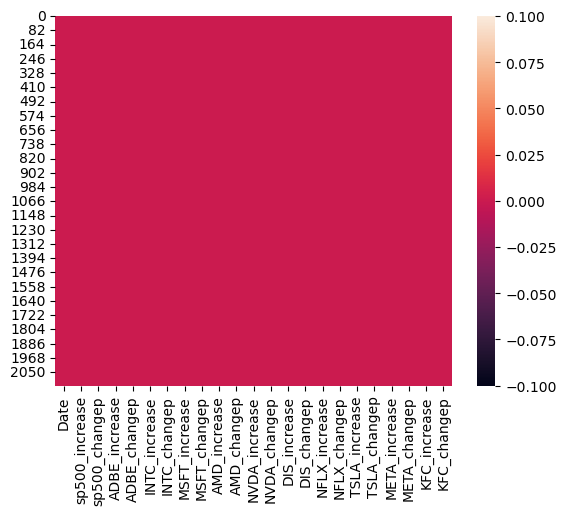

In [15]:
sns.heatmap(df.isnull())

In [16]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\Venkat\AppData\Local\Temp\ipykernel_22424\936118274.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [17]:
df.dtypes

Date              datetime64[ns]
sp500_increase             int64
sp500_changep            float64
ADBE_increase              int64
ADBE_changep             float64
INTC_increase              int64
INTC_changep             float64
MSFT_increase              int64
MSFT_changep             float64
AMD_increase               int64
AMD_changep              float64
NVDA_increase              int64
NVDA_changep             float64
DIS_increase               int64
DIS_changep              float64
NFLX_increase              int64
NFLX_changep             float64
TSLA_increase              int64
TSLA_changep             float64
META_increase              int64
META_changep             float64
KFC_increase               int64
KFC_changep              float64
dtype: object

In [18]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year

In [19]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [20]:
df["Day"] = pd.to_datetime(df["Date"]).dt.day_name()

In [21]:
df.head(2)

,Date,sp500_increase,sp500_changep,ADBE_increase,ADBE_changep,INTC_increase,INTC_changep,MSFT_increase,MSFT_changep,AMD_increase,...,NFLX_changep,TSLA_increase,TSLA_changep,META_increase,META_changep,KFC_increase,KFC_changep,Year,Month,Day
0,2021-04-19,0,-0.252251,0,-1.330457,0,-1.653780,0,-0.557290,0,...,1.378676,0,-0.690660,0,-0.908173,1,0.096339,2021,4,Monday
1,2021-04-16,1,0.002399,1,0.165963,0,-0.887803,1,0.489455,0,...,-0.726559,1,1.527485,0,-0.645754,1,0.241546,2021,4,Friday


# "S&P 500 Growth Analysis: Tracking Market Increases Over Time"

In [23]:
df.sp500_increase.value_counts()

sp500_increase
 1    1166
 0     947
-1      15
Name: count, dtype: int64

In [24]:
df1 = df[["sp500_changep","sp500_increase","Year","Date","Month"]].corr()
df1

,sp500_changep,sp500_increase,Year,Date,Month
sp500_changep,1.000000,0.659186,-0.003917,-0.008725,-0.039660
sp500_increase,0.659186,1.000000,0.002190,-0.004604,-0.055755
Year,-0.003917,0.002190,1.000000,0.993944,-0.142545
Date,-0.008725,-0.004604,0.993944,1.000000,-0.033310
Month,-0.039660,-0.055755,-0.142545,-0.033310,1.000000


<Axes: >

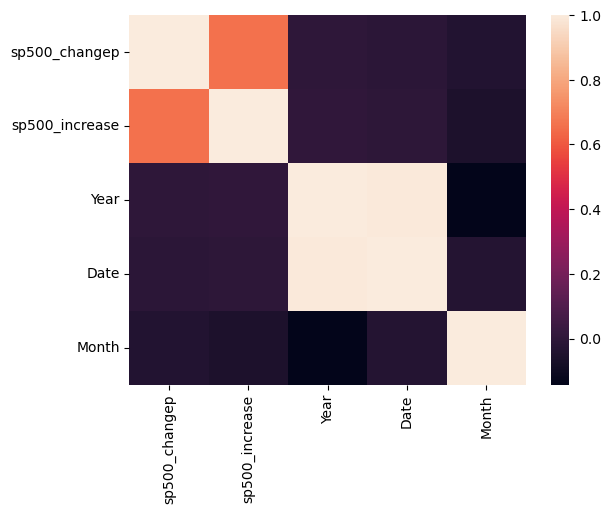

In [25]:
sns.heatmap(df1)

### **sp500_changep and sp500_increase (0.659186):**
+ There is a moderate positive correlation between sp500_changep and sp500_increase. This means that as the change in the S&P 500 increases, the likelihood of an increase also rises.

### **sp500_changep and Year (-0.003917):**
+ There is a very weak negative correlation between sp500_changep and the Year. This suggests that over time, there is almost no noticeable relationship between the change in the S&P 500 and the year.

### **sp500_changep and Date (-0.008725):**
+ There is a very weak negative correlation between sp500_changep and Date, indicating that changes in the S&P 500 over time are not strongly associated with specific calendar dates.

### **sp500_changep and Month (-0.039660):**
+ There is a weak negative correlation between sp500_changep and Month, which could suggest slight seasonal effects or patterns, though the relationship is weak.

### **sp500_increase and Year (0.002190):**
+ There is a very weak positive correlation between sp500_increase and the Year. This means the likelihood of an increase in the S&P 500 is almost unaffected by the year.

### **sp500_increase and Date (-0.004604):**
+ There is a very weak negative correlation between sp500_increase and Date, showing that specific dates don’t significantly impact whether the S&P 500 increases.

### **sp500_increase and Month (-0.055755):**
+ There is a weak negative correlation between sp500_increase and the Month, suggesting that the S&P 500 increase may vary slightly depending on the month, though the relationship is not strong.

**sorting values for sp500**

In [34]:
df["sp500_changep"].sort_values(ascending=False)

251     4.680991
540     4.326818
253     3.724083
268     3.648437
763     3.535432
          ...   
764    -3.481448
202    -3.483595
272    -3.485216
761    -3.872991
1351   -4.175402
Name: sp500_changep, Length: 2128, dtype: float64

# max in 5p500

In [36]:
max_row = df.loc[df["sp500_changep"].idxmax(), ["sp500_changep", "Date","Year","Month","Day"]]
print(max_row)

sp500_changep               4.680991
Date             2020-03-26 00:00:00
Year                            2020
Month                              3
Day                         Thursday
Name: 251, dtype: object


In [37]:
max_row

sp500_changep               4.680991
Date             2020-03-26 00:00:00
Year                            2020
Month                              3
Day                         Thursday
Name: 251, dtype: object

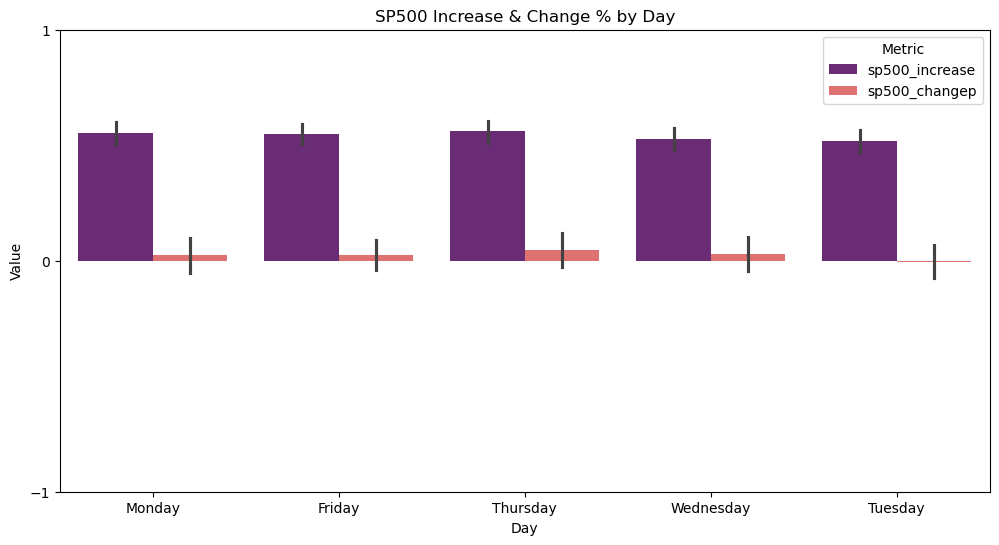

In [38]:

# Melt the DataFrame to reshape "sp500_increase" and "sp500_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["sp500_increase", "sp500_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("SP500 Increase & Change % by Day")

# Show the plot
plt.show()

In [39]:
df_melted

,Day,Metric,Value
0,Monday,sp500_increase,0.000000
1,Friday,sp500_increase,1.000000
2,Thursday,sp500_increase,1.000000
3,Wednesday,sp500_increase,0.000000
4,Tuesday,sp500_increase,1.000000
...,...,...,...
4251,Thursday,sp500_changep,-0.075402
4252,Wednesday,sp500_changep,0.777146
4253,Tuesday,sp500_changep,-0.083139
4254,Monday,sp500_changep,1.390594


In [40]:
df["sp500_changep"].sort_values(ascending=True)

1351   -4.175402
761    -3.872991
272    -3.485216
202    -3.483595
764    -3.481448
          ...   
763     3.535432
268     3.648437
253     3.724083
540     4.326818
251     4.680991
Name: sp500_changep, Length: 2128, dtype: float64

In [41]:
max_row = df.loc[df["sp500_changep"].idxmin(), ["sp500_changep", "Date","Year","Month","Day"]]
print(max_row)

sp500_changep              -4.175402
Date             2015-08-25 00:00:00
Year                            2015
Month                              8
Day                          Tuesday
Name: 1351, dtype: object


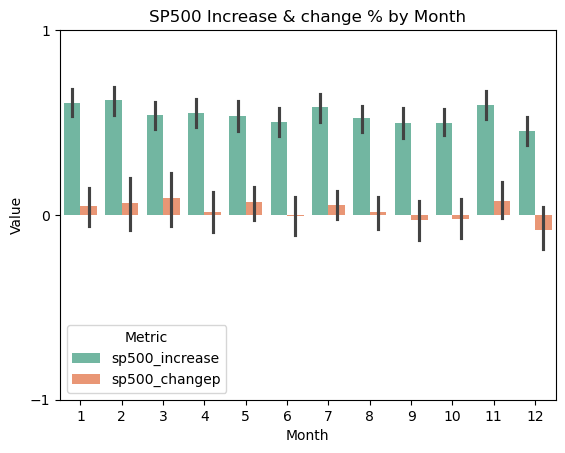

In [42]:
melted = df.melt(id_vars="Month",value_vars=["sp500_increase","sp500_changep"],
                 var_name= "Metric", value_name = "Value")
sns.barplot(data = melted, x = "Month", y = "Value", hue = "Metric", palette="Set2")
plt.yticks([-1,0,1])
plt.title("SP500 Increase & change % by Month")
plt.show()

# min in sp500

C:\Users\Venkat\AppData\Local\Temp\ipykernel_22424\3934440717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Year", y = "sp500_increase", palette="rocket")


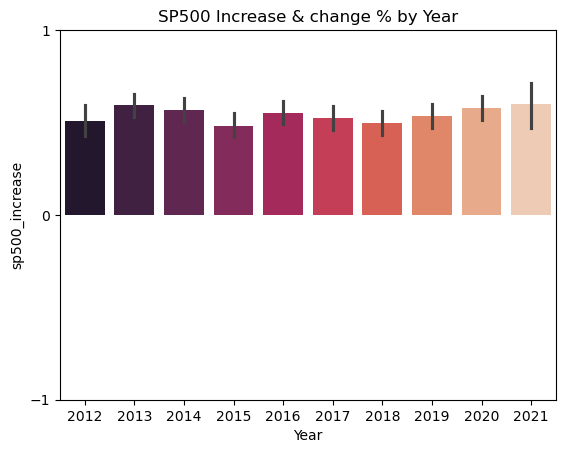

C:\Users\Venkat\AppData\Local\Temp\ipykernel_22424\3934440717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Year", y = "sp500_changep", palette="rocket")


<Axes: xlabel='Year', ylabel='sp500_changep'>

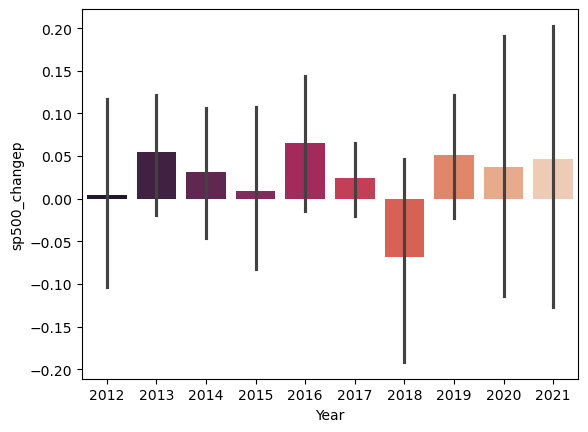

In [44]:
# melted = df.melt(id_vars="Year",value_vars=["sp500_increase","sp500_changep"],
#                  var_name= "Metric", value_name = "Value")



sns.barplot(data = df, x = "Year", y = "sp500_increase", palette="rocket")
plt.yticks([-1,0,1])
plt.title("SP500 Increase & change % by Year")
plt.show()
sns.barplot(data = df, x = "Year", y = "sp500_changep", palette="rocket")

In [45]:
min_row = df.loc[df["sp500_changep"].idxmin(), ["sp500_changep", "Date","Year","Month","Day"]]

In [46]:
min_row

sp500_changep              -4.175402
Date             2015-08-25 00:00:00
Year                            2015
Month                              8
Day                          Tuesday
Name: 1351, dtype: object

### **The maximum positive change in the S&P 500 (4.68) happened on March 26, 2020 (Thursday), during a period of extreme volatility driven by the COVID-19 pandemic.**

### **The maximum negative change in the S&P 500 (-4.18) occurred on August 25, 2015 (Tuesday), during a period of heightened global market volatility.**

# Market Influence & Correlation with s&p_500

## ADBE: Adobe Inc. Common Stoc

In [51]:
df["ADBE_increase"].value_counts()

ADBE_increase
 1    1160
 0     963
-1       5
Name: count, dtype: int64

In [52]:
df[df["Date"]== "2018-12-26"]

,Date,sp500_increase,sp500_changep,ADBE_increase,ADBE_changep,INTC_increase,INTC_changep,MSFT_increase,MSFT_changep,AMD_increase,...,NFLX_changep,TSLA_increase,TSLA_changep,META_increase,META_changep,KFC_increase,KFC_changep,Year,Month,Day
540,2018-12-26,1,4.326818,1,7.950418,1,4.97727,1,5.696866,1,...,8.443058,1,8.696661,1,6.492058,1,1.085094,2018,12,Wednesday


In [53]:
maxi = df.loc[df["ADBE_changep"].idxmax(), ["ADBE_changep","Date","Year","Month","Day"]]

In [54]:
maxi

ADBE_changep               7.950418
Date            2018-12-26 00:00:00
Year                           2018
Month                            12
Day                       Wednesday
Name: 540, dtype: object

In [55]:
df.columns

Index(['Date', 'sp500_increase', 'sp500_changep', 'ADBE_increase',
       'ADBE_changep', 'INTC_increase', 'INTC_changep', 'MSFT_increase',
       'MSFT_changep', 'AMD_increase', 'AMD_changep', 'NVDA_increase',
       'NVDA_changep', 'DIS_increase', 'DIS_changep', 'NFLX_increase',
       'NFLX_changep', 'TSLA_increase', 'TSLA_changep', 'META_increase',
       'META_changep', 'KFC_increase', 'KFC_changep', 'Year', 'Month', 'Day'],
      dtype='object')

In [56]:
mini = df.loc[df["ADBE_changep"].idxmin(),["ADBE_changep","Date","Year","Month","Day"]]

In [57]:
mini

ADBE_changep              -7.498946
Date            2018-11-19 00:00:00
Year                           2018
Month                            11
Day                          Monday
Name: 564, dtype: object

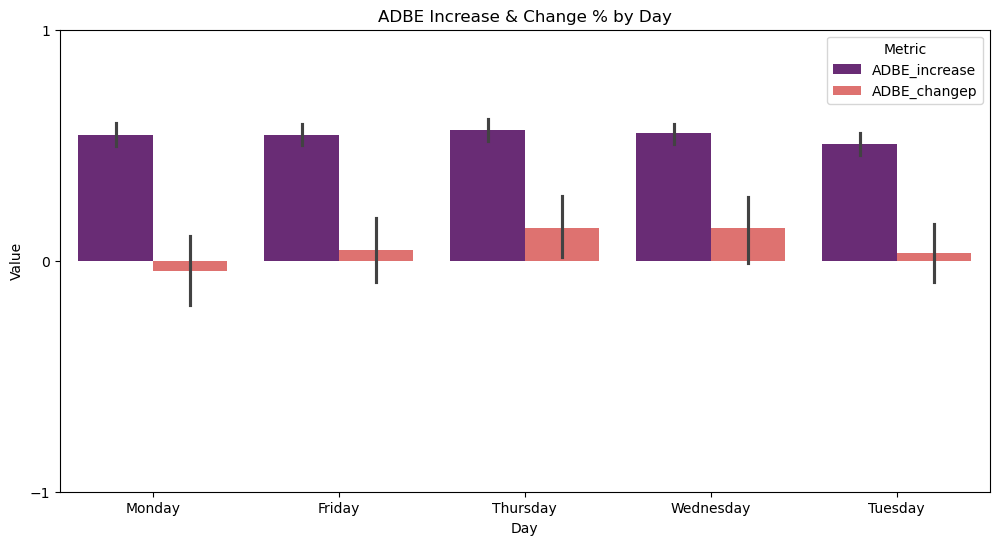

In [58]:

# Melt the DataFrame to reshape "ADBE_increase" and "ADBE_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["ADBE_increase", "ADBE_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("ADBE Increase & Change % by Day")

# Show the plot
plt.show()

In [59]:
df.columns

Index(['Date', 'sp500_increase', 'sp500_changep', 'ADBE_increase',
       'ADBE_changep', 'INTC_increase', 'INTC_changep', 'MSFT_increase',
       'MSFT_changep', 'AMD_increase', 'AMD_changep', 'NVDA_increase',
       'NVDA_changep', 'DIS_increase', 'DIS_changep', 'NFLX_increase',
       'NFLX_changep', 'TSLA_increase', 'TSLA_changep', 'META_increase',
       'META_changep', 'KFC_increase', 'KFC_changep', 'Year', 'Month', 'Day'],
      dtype='object')

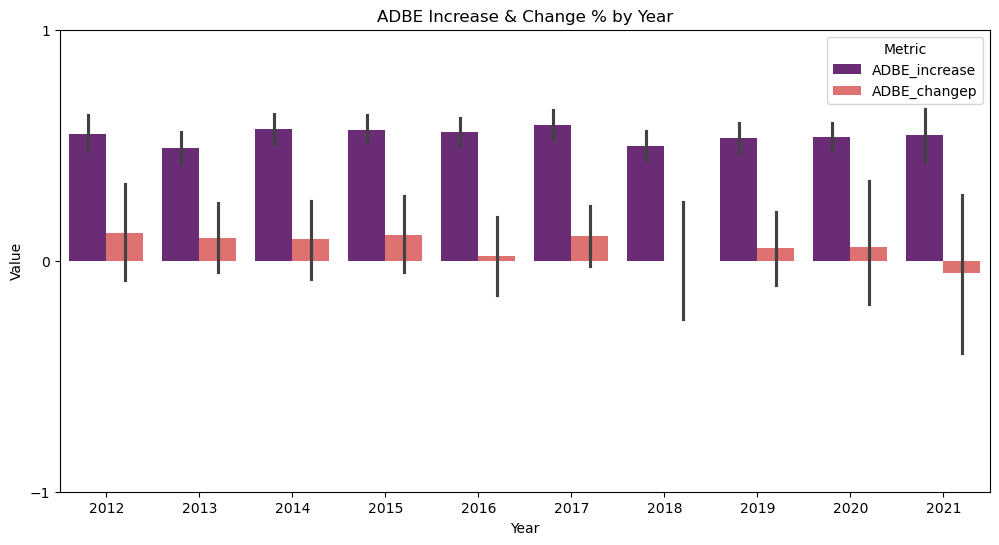

In [60]:

# Melt the DataFrame to reshape "ADBE_increase" and "ADBE_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["ADBE_increase", "ADBE_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("ADBE Increase & Change % by Year")

# Show the plot
plt.show()

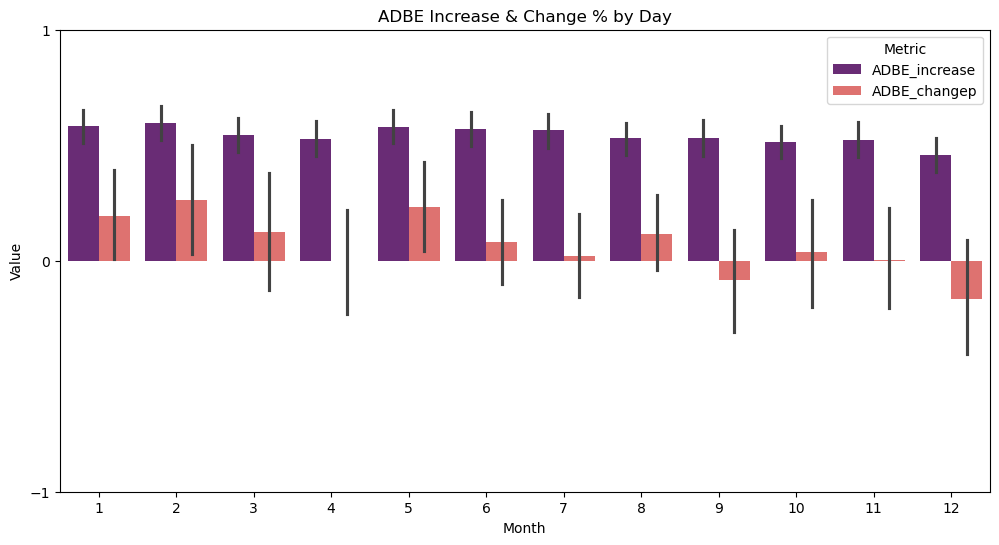

In [61]:

# Melt the DataFrame to reshape "ADBE_increase" and "ADBE_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["ADBE_increase", "ADBE_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("ADBE Increase & Change % by Day")

# Show the plot
plt.show()

### **The maximum positive change of +7.95% in Adobe's stock occurred on December 26, 2018, a day marked by a strong market rebound. This significant increase likely reflects positive market sentiment following a period of significant market declines in late 2018.** 

### **The maximum negative change of -7.50% in Adobe's stock occurred on November 19, 2018, a day of sharp decline likely driven by broader market downturns or negative news surrounding Adobe's performance.**

In [64]:
df1 = df[["sp500_changep","ADBE_changep"]].sort_values(by = "sp500_changep",ascending=False)

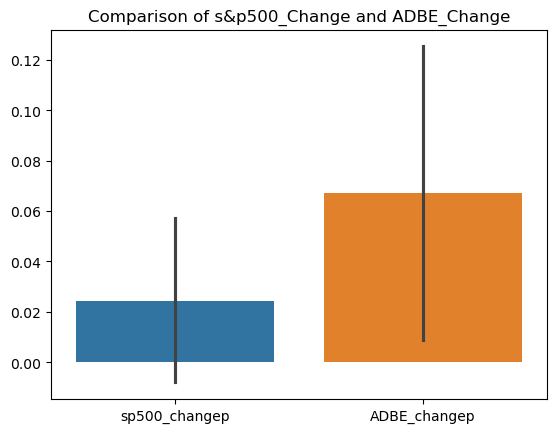

In [65]:
sns.barplot(df1)
plt.title("Comparison of s&p500_Change and ADBE_Change")
plt.show()

In [66]:
df2 = df[["sp500_increase","ADBE_increase"]].sort_values(by = "sp500_increase", ascending=False)

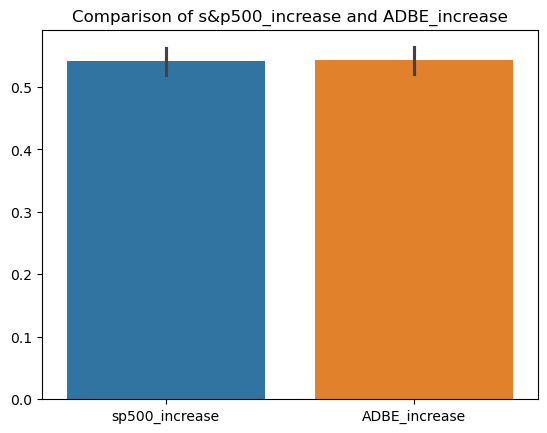

In [67]:
sns.barplot(df2)
plt.title("Comparison of s&p500_increase and ADBE_increase")
plt.show()

## INTC : Intel Corporation Common Stock

In [69]:
df["INTC_increase"].value_counts()

INTC_increase
 1    1107
 0     996
-1      25
Name: count, dtype: int64

In [70]:
maxi = df.loc[df["INTC_changep"].idxmax(),["INTC_changep","Date","Year","Month","Day"]]

In [71]:
maxi

INTC_changep               12.78492
Date            2020-03-13 00:00:00
Year                           2020
Month                             3
Day                          Friday
Name: 259, dtype: object

In [72]:
mini = df.loc[df["INTC_changep"].idxmin(),["INTC_changep","Date","Year","Month","Day"]]

In [73]:
mini

INTC_changep              -6.818866
Date            2021-03-24 00:00:00
Year                           2021
Month                             3
Day                       Wednesday
Name: 17, dtype: object

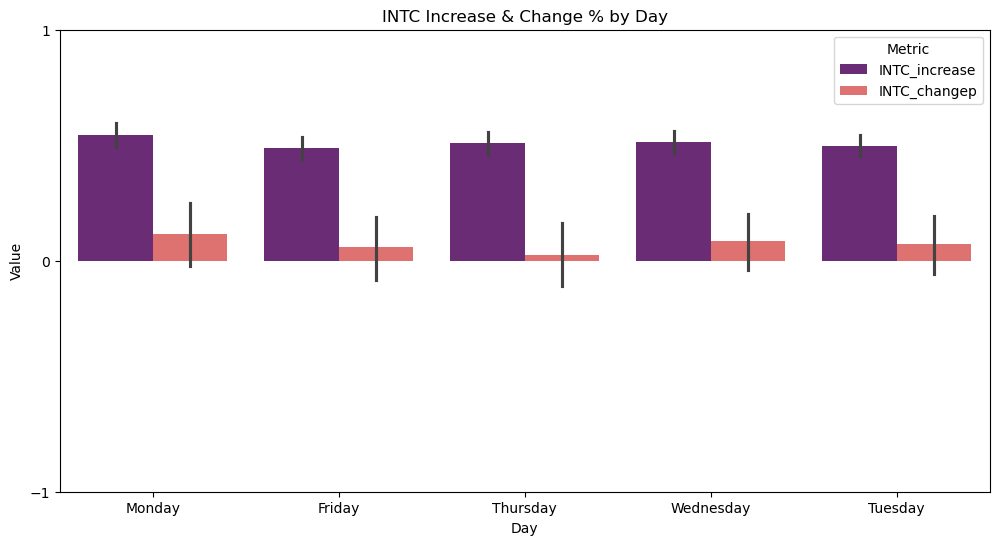

In [74]:

# Melt the DataFrame to reshape "INTC_increase" and "INTC_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["INTC_increase", "INTC_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("INTC Increase & Change % by Day")

# Show the plot
plt.show()

### **The maximum positive change of +12.78% in Intel's stock occurred on March 13, 2020, during a time of extreme market volatility caused by the onset of the COVID-19 pandemic.**

### **The maximum negative change of -6.82% in Intel's stock occurred on March 24, 2021, during a period when the market had started to recover from the pandemic's initial shock.**

In [77]:
df1 = df[["sp500_changep","INTC_changep"]].sort_values(by = "sp500_changep", ascending=False)

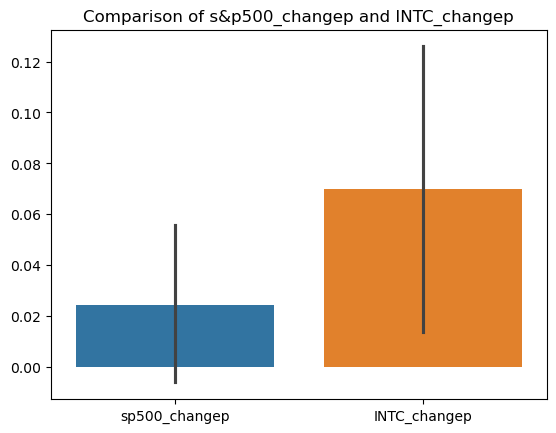

In [78]:
sns.barplot(df1)
plt.title("Comparison of s&p500_changep and INTC_changep")
plt.show()

In [79]:
df2 = df[["sp500_increase","INTC_increase"]].sort_values(by = "sp500_increase", ascending=False)

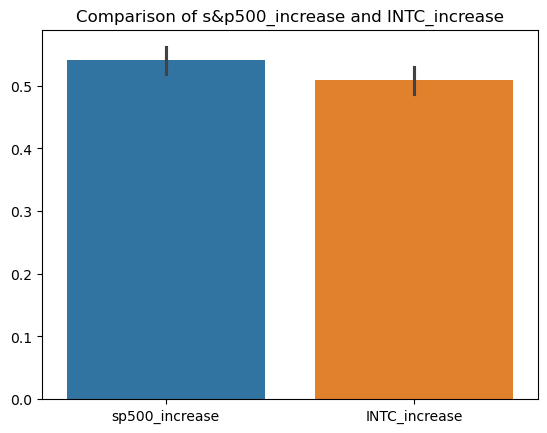

In [80]:
sns.barplot(df2)
plt.title("Comparison of s&p500_increase and INTC_increase")
plt.show()

## MSFT : Microsoft Corporation Common Stock

In [82]:
df["MSFT_increase"].value_counts()

MSFT_increase
 1    1111
 0     992
-1      25
Name: count, dtype: int64

In [83]:
maxi= df.loc[df["MSFT_changep"].idxmax(),["MSFT_changep","Date","Year","Month","Day"]]

In [84]:
maxi

MSFT_changep               7.681357
Date            2020-03-13 00:00:00
Year                           2020
Month                             3
Day                          Friday
Name: 259, dtype: object

In [85]:
mini = df.loc[df["MSFT_changep"].idxmin(),["MSFT_changep","Date","Year","Month","Day"]]

In [86]:
mini

MSFT_changep              -5.761535
Date            2018-03-27 00:00:00
Year                           2018
Month                             3
Day                         Tuesday
Name: 729, dtype: object

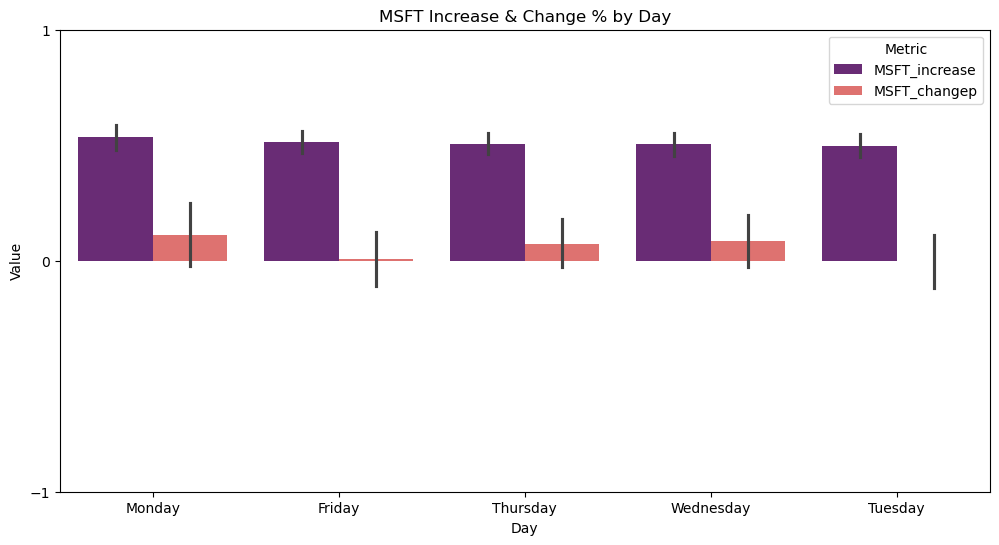

In [87]:
# Melt the DataFrame to reshape "MSFT_increase" and "MSFT_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["MSFT_increase", "MSFT_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("MSFT Increase & Change % by Day")

# Show the plot
plt.show()

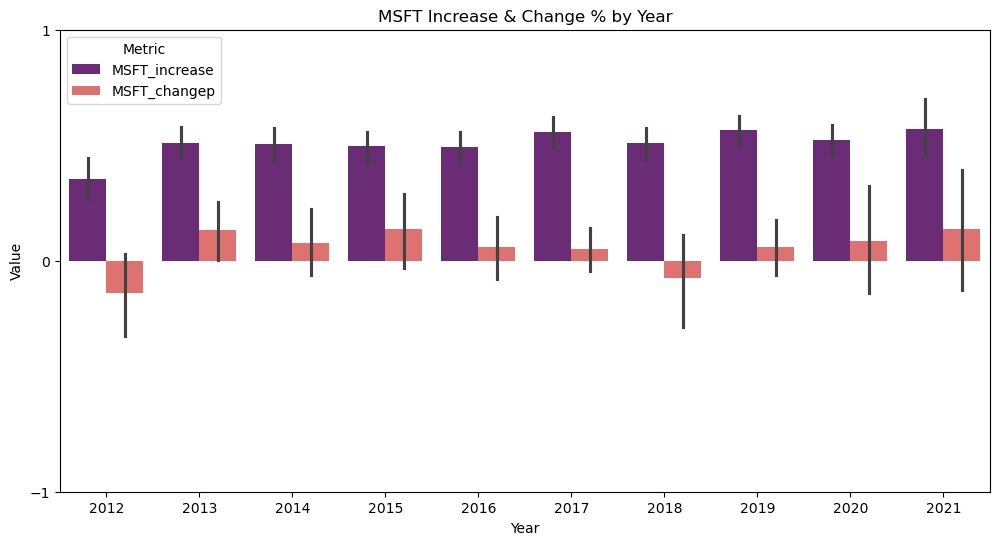

In [88]:

# Melt the DataFrame to reshape "MSFT_increase" and "MSFT_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["MSFT_increase", "MSFT_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("MSFT Increase & Change % by Year")

# Show the plot
plt.show()

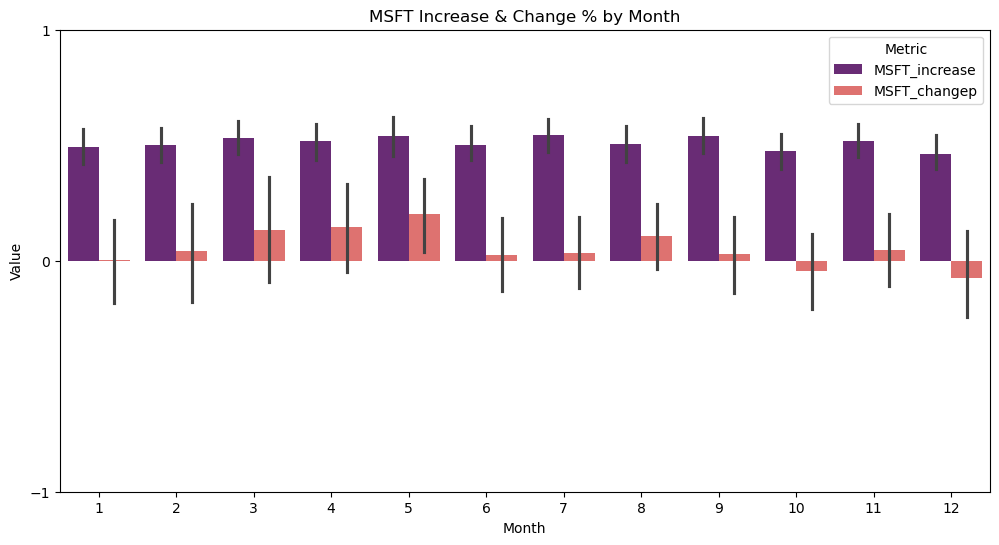

In [89]:

# Melt the DataFrame to reshape "sp500_increase" and "sp500_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["MSFT_increase", "MSFT_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("MSFT Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +7.68% in Microsoft’s stock occurred on March 13, 2020, during the early stages of the COVID-19 pandemic.** 

### **The maximum negative change of -5.76% in Microsoft’s stock occurred on March 27, 2018, which likely reflects a negative market reaction to company-specific news, earnings reports, or broader sector trends.**

In [92]:
df1 = df[["sp500_changep","MSFT_changep"]].sort_values(by = "sp500_changep", ascending=False)

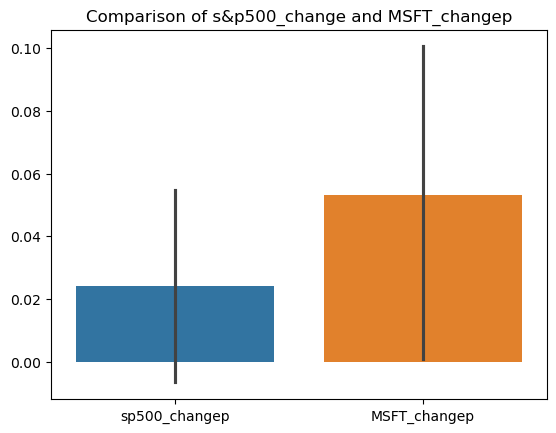

In [93]:
sns.barplot(df1)
plt.title("Comparison of s&p500_change and MSFT_changep")
plt.show()

In [94]:
df2 = df[["sp500_increase","MSFT_increase"]].sort_values(by="sp500_increase",ascending=False)

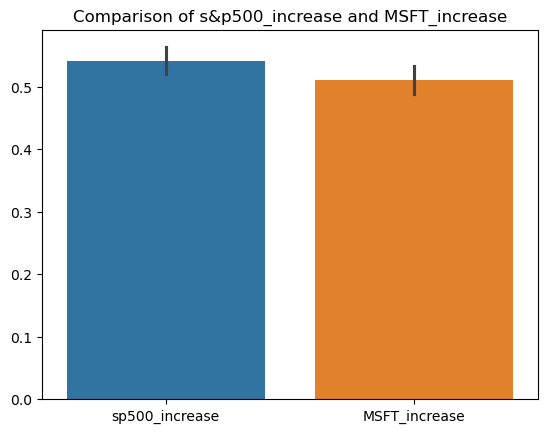

In [95]:
sns.barplot(df2)
plt.title("Comparison of s&p500_increase and MSFT_increase")
plt.show()

## AMD : Advanced Micro Devices, Inc. Common Stock

In [97]:
df["AMD_increase"].value_counts()

AMD_increase
 0    1099
 1     969
-1      60
Name: count, dtype: int64

In [98]:
maxi = df.loc[df["AMD_changep"].idxmax(),["AMD_changep","Date","Year","Month","Day"]]

In [99]:
maxi

AMD_changep              25.078368
Date           2016-04-22 00:00:00
Year                          2016
Month                            4
Day                         Friday
Name: 1196, dtype: object

In [100]:
mini = df.loc[df["AMD_changep"].idxmin(),["AMD_changep","Date","Year","Month","Day"]]

In [101]:
mini

AMD_changep             -14.173224
Date           2012-10-19 00:00:00
Year                          2012
Month                           10
Day                         Friday
Name: 2023, dtype: object

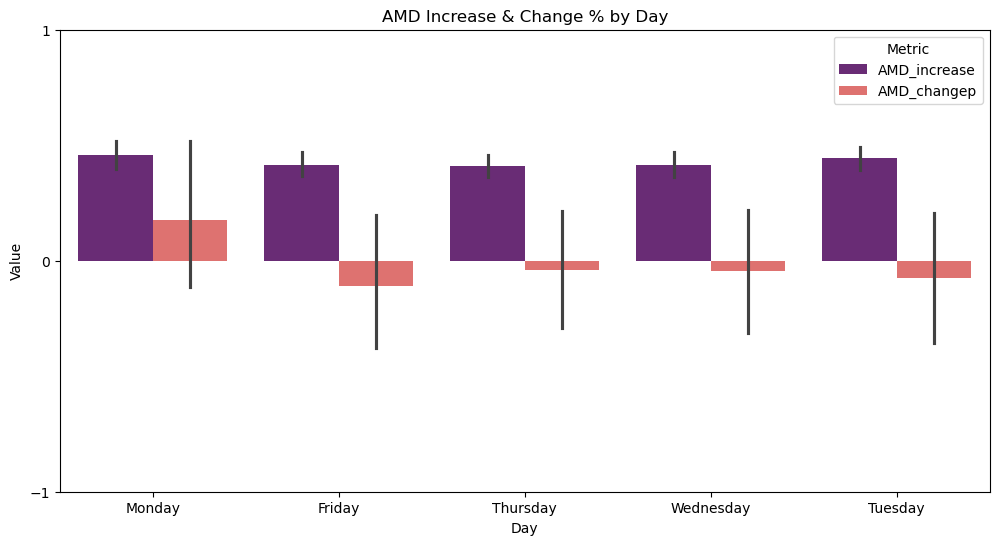

In [102]:

# Melt the DataFrame to reshape "AMD_increase" and "AMD_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["AMD_increase", "AMD_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("AMD Increase & Change % by Day")

# Show the plot
plt.show()

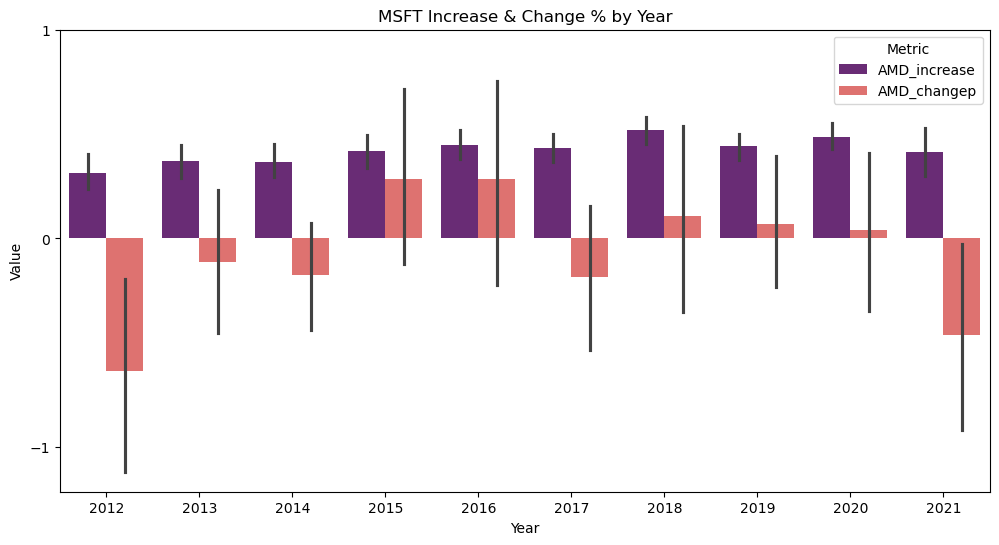

In [103]:
# Melt the DataFrame to reshape "AMD_increase" and "AMD_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["AMD_increase", "AMD_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("MSFT Increase & Change % by Year")

# Show the plot
plt.show()

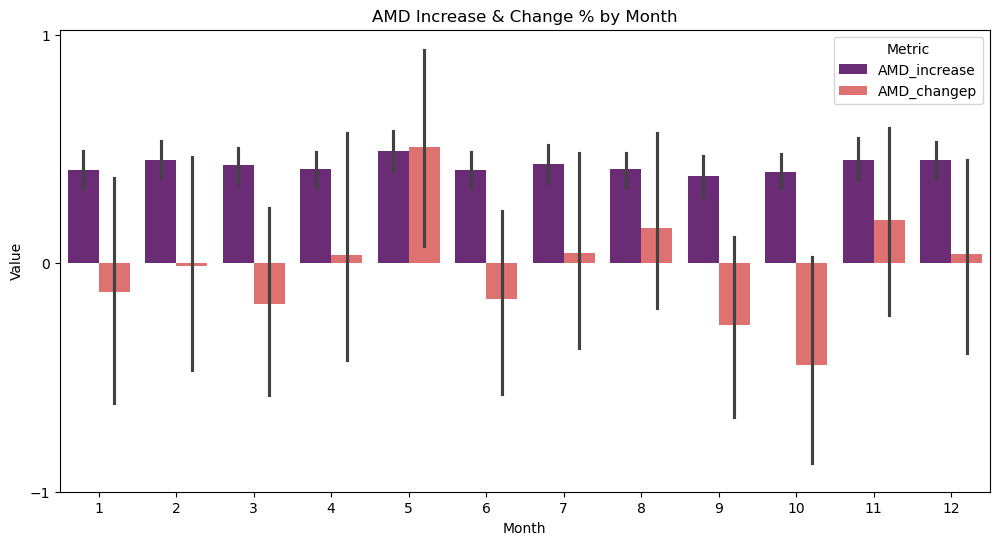

In [104]:
# Melt the DataFrame to reshape "AMD_increase" and "AMD_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["AMD_increase", "AMD_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("AMD Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +25.08% in AMD's stock occurred on April 22, 2016, which represents a significant rally in the stock.**

### **The maximum negative change of -14.17% in AMD's stock occurred on October 19, 2012, a sharp decline that likely resulted from disappointing earnings, poor product reception, or a negative market sentiment towards AMD at that time.**

In [107]:
df1 = df[["sp500_changep","AMD_changep"]].sort_values(by = "sp500_changep", ascending=False)

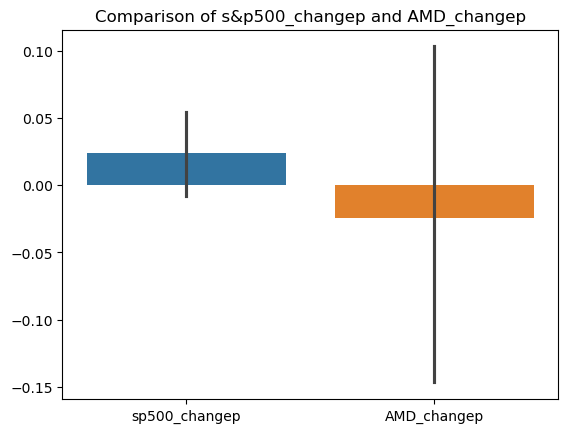

In [108]:
sns.barplot(df1)
plt.title("Comparison of s&p500_changep and AMD_changep")
plt.show()

In [109]:
df.columns

Index(['Date', 'sp500_increase', 'sp500_changep', 'ADBE_increase',
       'ADBE_changep', 'INTC_increase', 'INTC_changep', 'MSFT_increase',
       'MSFT_changep', 'AMD_increase', 'AMD_changep', 'NVDA_increase',
       'NVDA_changep', 'DIS_increase', 'DIS_changep', 'NFLX_increase',
       'NFLX_changep', 'TSLA_increase', 'TSLA_changep', 'META_increase',
       'META_changep', 'KFC_increase', 'KFC_changep', 'Year', 'Month', 'Day'],
      dtype='object')

In [110]:
df2 = df[["sp500_increase","AMD_increase"]].sort_values(by = "sp500_increase", ascending=False)

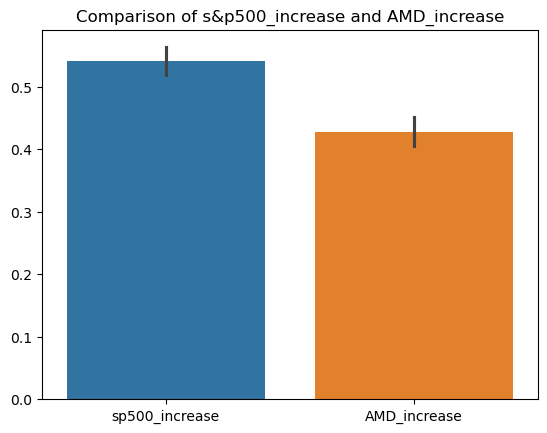

In [111]:
sns.barplot(df2)
plt.title("Comparison of s&p500_increase and AMD_increase")
plt.show()

## NVDA : NVIDIA Corporation Common Stock 

In [113]:
df["NVDA_increase"].value_counts()

NVDA_increase
 1    1100
 0    1015
-1      13
Name: count, dtype: int64

In [114]:
maxi = df.loc[df["NVDA_changep"].idxmax(),["NVDA_changep","Date","Year","Month","Day"]]

In [115]:
maxi

NVDA_changep              11.387445
Date            2020-02-28 00:00:00
Year                           2020
Month                             2
Day                          Friday
Name: 269, dtype: object

In [116]:
mini = df.loc[df["NVDA_changep"].idxmin(),["NVDA_changep","Date","Year","Month","Day"]]

In [117]:
mini

NVDA_changep             -10.563074
Date            2018-11-19 00:00:00
Year                           2018
Month                            11
Day                          Monday
Name: 564, dtype: object

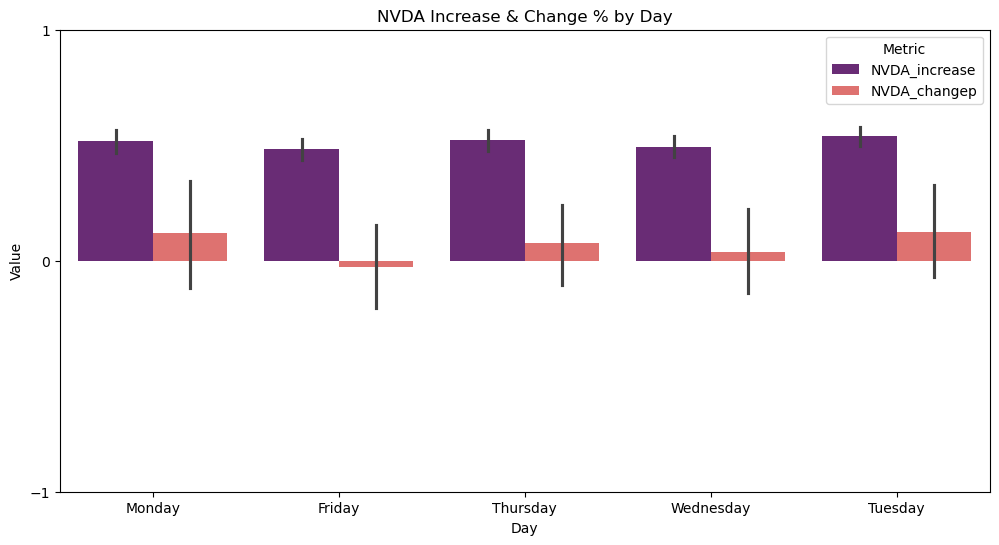

In [118]:
# Melt the DataFrame to reshape "NVDA_increase" and "NVDA_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["NVDA_increase", "NVDA_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("NVDA Increase & Change % by Day")

# Show the plot
plt.show()

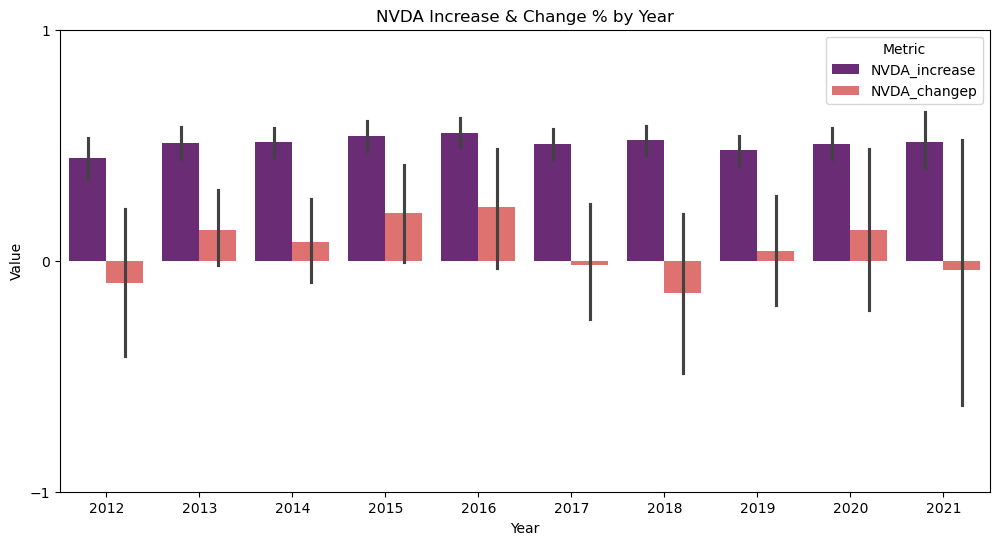

In [119]:
# Melt the DataFrame to reshape "NVDA_increase" and "NVDA_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["NVDA_increase", "NVDA_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("NVDA Increase & Change % by Year")

# Show the plot
plt.show()

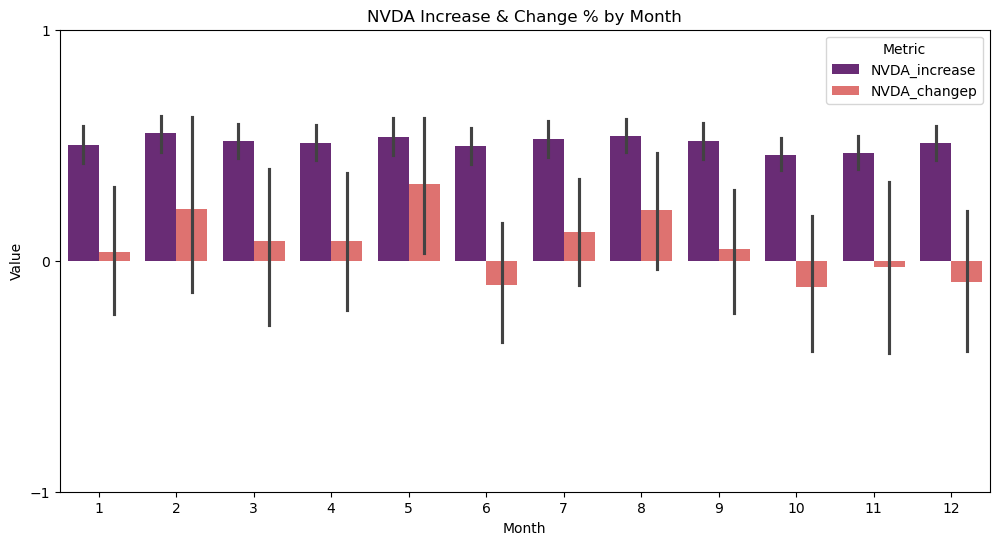

In [120]:
# Melt the DataFrame to reshape "MSFT_increase" and "MSFT_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["NVDA_increase", "NVDA_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("NVDA Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +11.39% in Nvidia’s stock occurred on February 28, 2020, during a period of significant market volatility caused by the early stages of the COVID-19 pandemic.** 

### **The maximum negative change of -10.56% in Nvidia’s stock occurred on November 19, 2018, which likely reflects disappointing earnings, a weaker outlook, or negative market sentiment toward the company.** 

In [123]:
df1 = df[["sp500_increase","NVDA_increase"]].sort_values(by = "sp500_increase",ascending = False)

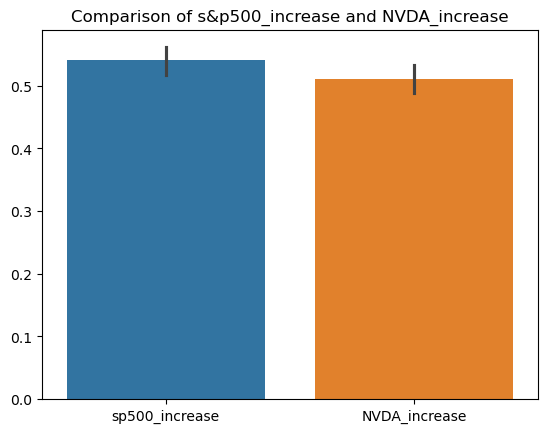

In [124]:
sns.barplot(df1)
plt.title("Comparison of s&p500_increase and NVDA_increase")
plt.show()

In [125]:
df2 = df[["sp500_changep","NVDA_changep"]].sort_values(by="sp500_changep",ascending=False)

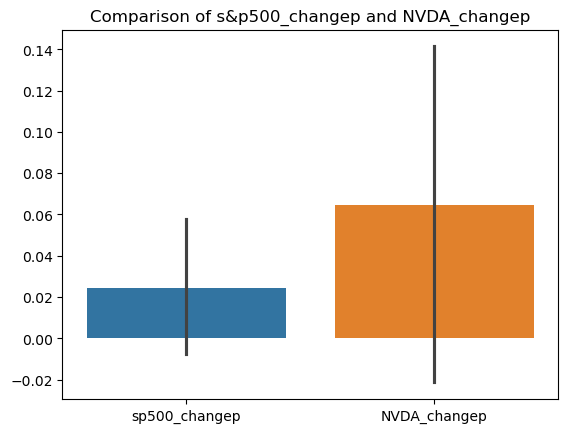

In [126]:
sns.barplot(df2)
plt.title("Comparison of s&p500_changep and NVDA_changep")
plt.show()

## DIS : THE WALT DISNEY COMPANY

In [128]:
df["DIS_increase"].value_counts()

DIS_increase
 0    1061
 1    1056
-1      11
Name: count, dtype: int64

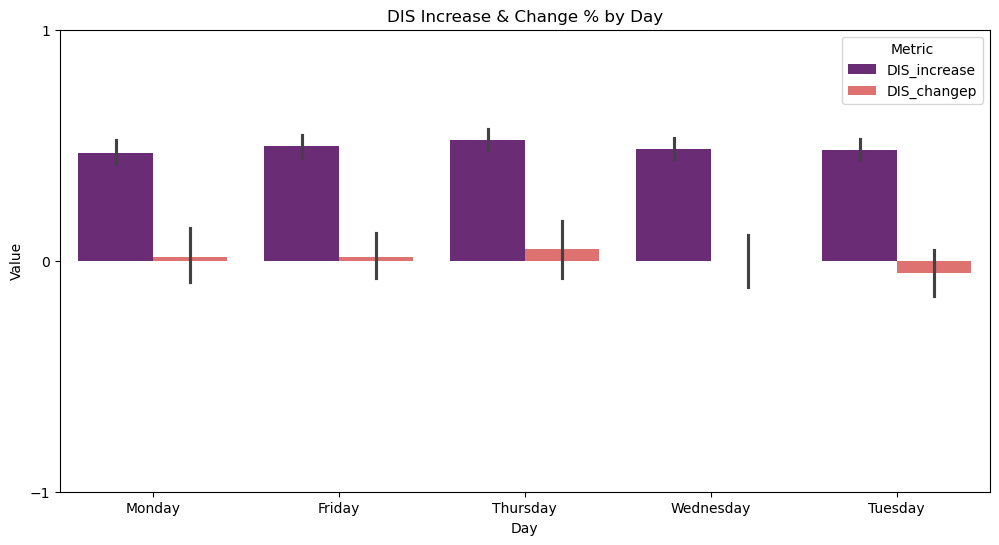

In [129]:
# Melt the DataFrame to reshape "DIS_increase" and "DIS_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["DIS_increase", "DIS_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("DIS Increase & Change % by Day")

# Show the plot
plt.show()

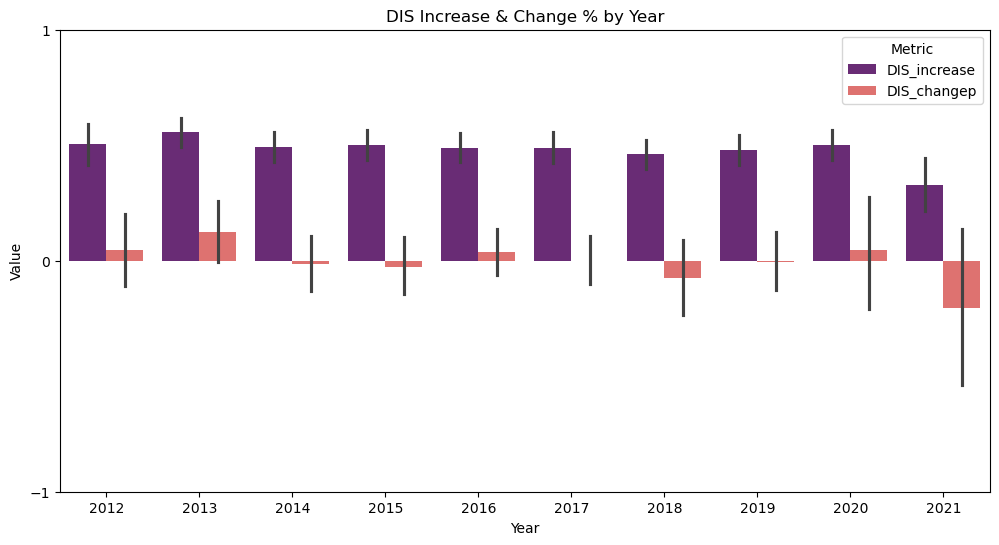

In [130]:
# Melt the DataFrame to reshape "DIS_increase" and "DIS_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["DIS_increase", "DIS_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("DIS Increase & Change % by Year")

# Show the plot
plt.show()

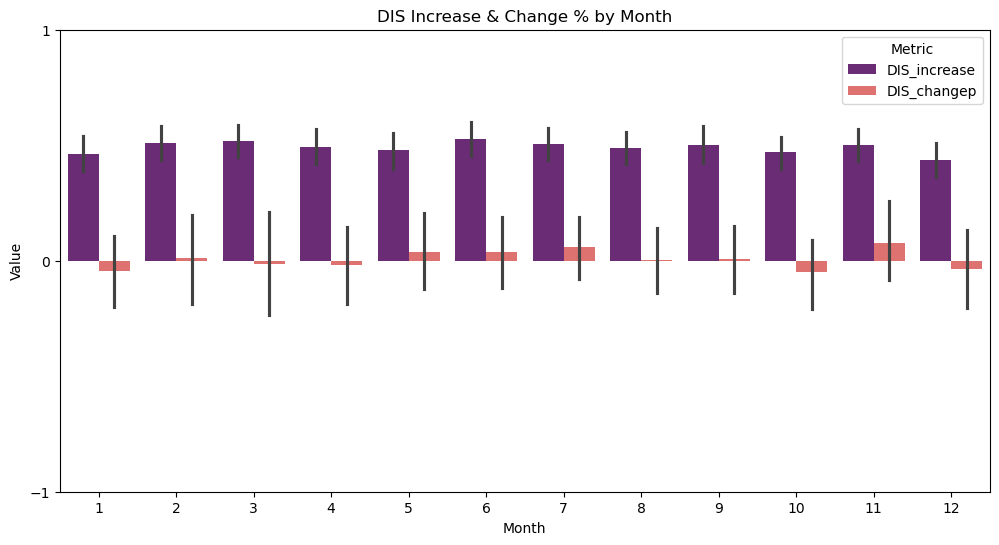

In [131]:
# Melt the DataFrame to reshape "DIS_increase" and "DIS_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["DIS_increase", "DIS_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("DIS Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +7.88% in Disney’s stock occurred on March 19, 2020, during the early stages of the COVID-19 pandemic.**

### **The maximum negative change of -5.95% in Disney’s stock occurred on March 12, 2020, during the same volatile period surrounding the COVID-19 pandemic.** 

In [134]:
df1 = df[["sp500_increase","DIS_increase"]].sort_values(by = "sp500_increase",ascending=False)

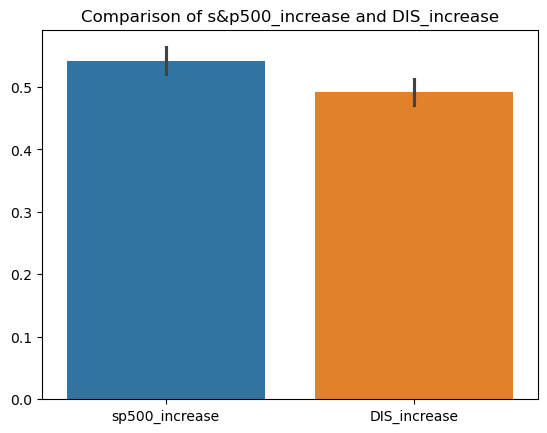

In [135]:
sns.barplot(df1)
plt.title("Comparison of s&p500_increase and DIS_increase")
plt.show()

In [136]:
df2 = df[["sp500_changep","DIS_changep"]].sort_values(by = "sp500_changep",ascending = False)

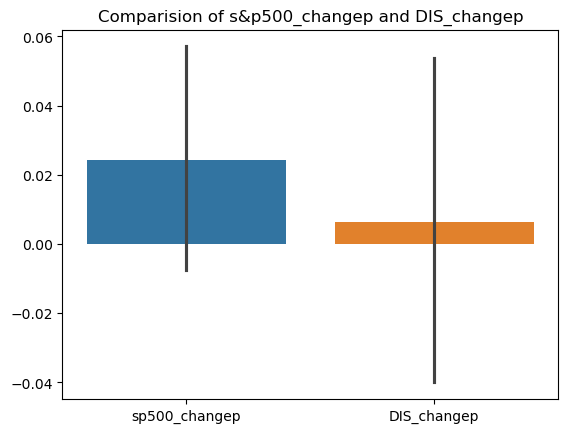

In [137]:
sns.barplot(df2)
plt.title("Comparision of s&p500_changep and DIS_changep")
plt.show()

In [138]:
maxi = df.loc[df["DIS_changep"].idxmax(),["DIS_changep","Date","Year","Month","Day"]]

In [139]:
maxi

DIS_changep                  7.875
Date           2020-03-19 00:00:00
Year                          2020
Month                            3
Day                       Thursday
Name: 255, dtype: object

In [140]:
mini = df.loc[df["DIS_changep"].idxmin(),["DIS_changep","Date","Year","Month","Day"]]

In [141]:
mini

DIS_changep              -5.951654
Date           2020-03-12 00:00:00
Year                          2020
Month                            3
Day                       Thursday
Name: 260, dtype: object

## NFLX: Netflix, Inc. Common Stock

In [143]:
df.columns

Index(['Date', 'sp500_increase', 'sp500_changep', 'ADBE_increase',
       'ADBE_changep', 'INTC_increase', 'INTC_changep', 'MSFT_increase',
       'MSFT_changep', 'AMD_increase', 'AMD_changep', 'NVDA_increase',
       'NVDA_changep', 'DIS_increase', 'DIS_changep', 'NFLX_increase',
       'NFLX_changep', 'TSLA_increase', 'TSLA_changep', 'META_increase',
       'META_changep', 'KFC_increase', 'KFC_changep', 'Year', 'Month', 'Day'],
      dtype='object')

In [144]:
df["NFLX_increase"].value_counts()

NFLX_increase
 0    1074
 1    1053
-1       1
Name: count, dtype: int64

In [145]:
maxi = df.loc[df["NFLX_changep"].idxmax(),["NFLX_changep","Date","Year","Day"]]

In [146]:
maxi

NFLX_changep              19.319378
Date            2012-10-31 00:00:00
Year                           2012
Day                       Wednesday
Name: 2017, dtype: object

In [147]:
mini = df.loc[df["NFLX_changep"].idxmax(),["NFLX_changep","Date","Year","Month","Day"]]

In [148]:
mini

NFLX_changep              19.319378
Date            2012-10-31 00:00:00
Year                           2012
Month                            10
Day                       Wednesday
Name: 2017, dtype: object

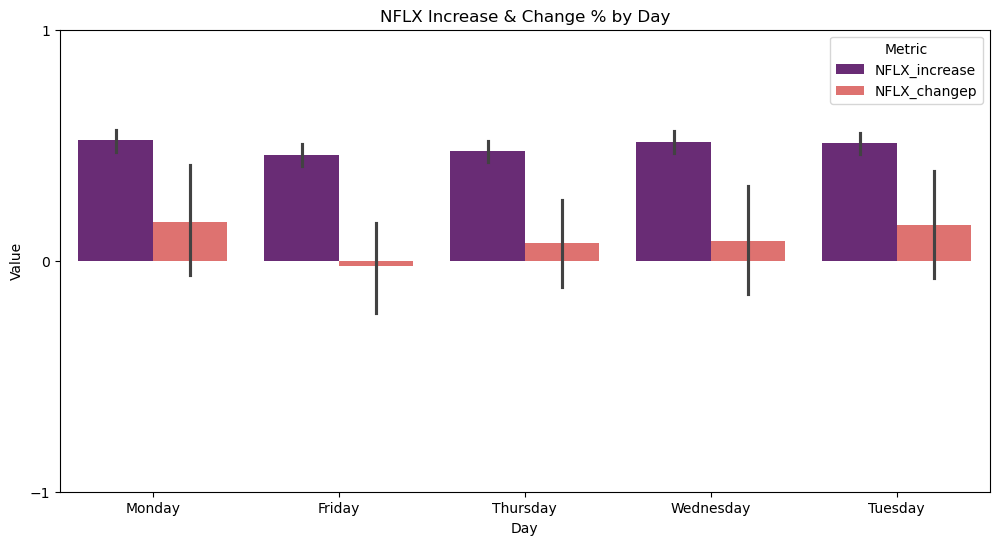

In [149]:
# Melt the DataFrame to reshape "NFLX_increase" and "NFLX_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["NFLX_increase", "NFLX_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("NFLX Increase & Change % by Day")

# Show the plot
plt.show()

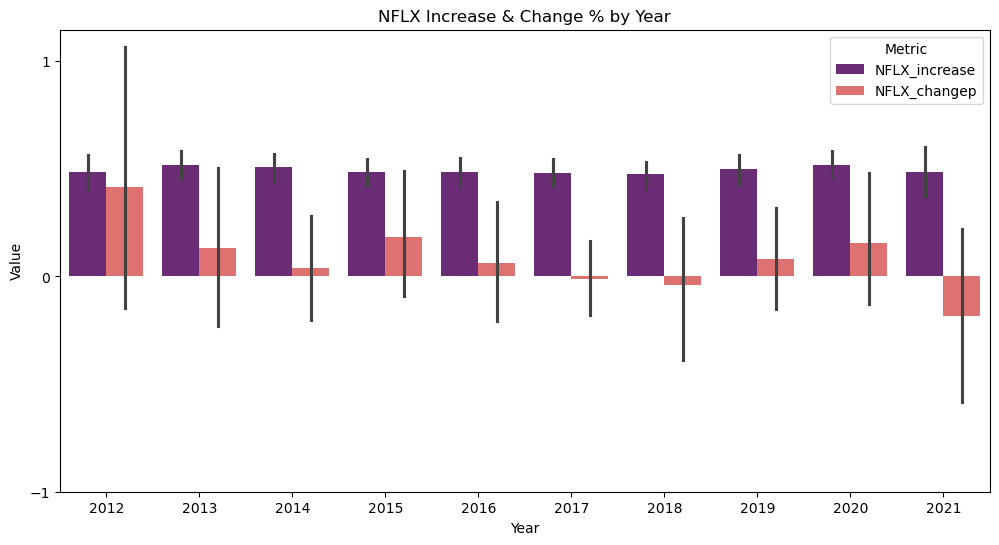

In [150]:
# Melt the DataFrame to reshape "NFLX_increase" and "NFLX_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["NFLX_increase", "NFLX_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("NFLX Increase & Change % by Year")

# Show the plot
plt.show()

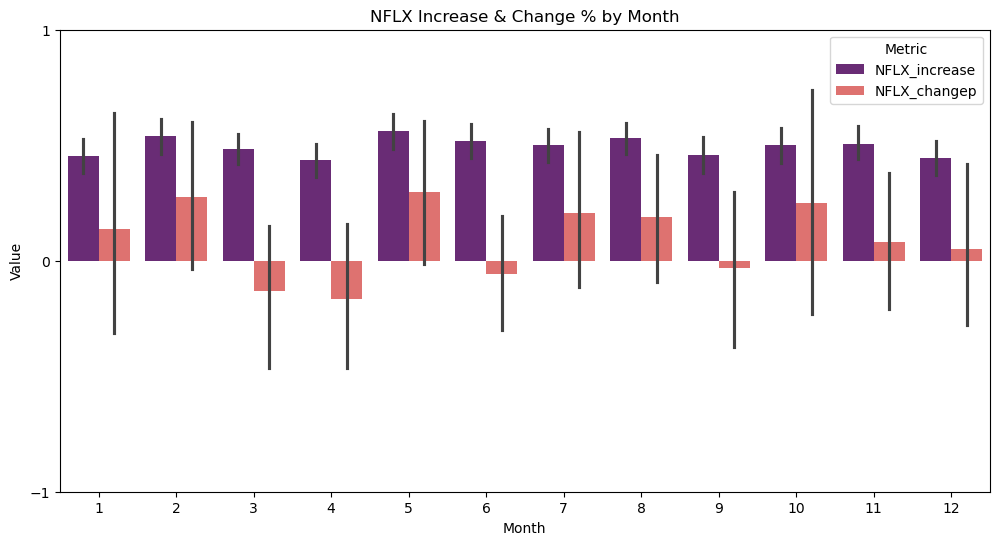

In [151]:
# Melt the DataFrame to reshape "NFLX_increase" and "NFLX_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["NFLX_increase", "NFLX_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("NFLX Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +19.32% in Netflix's stock occurred on October 31, 2012, which represents a significant increase.**

### **The maximum negative change of -5.95% in Disney’s stock occurred on March 12, 2020, during the same volatile period surrounding the COVID-19 pandemic. This drop could have been caused by concerns over Disney's core businesses, such as its theme parks, cruises, and movie releases, all of which were severely impacted by the pandemic and related shutdowns.**

In [154]:
df1 = df[["sp500_increase","NFLX_increase"]].sort_values(by = "sp500_increase",ascending=False)

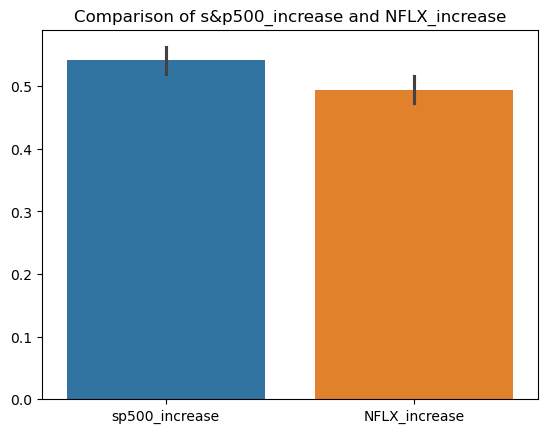

In [155]:
sns.barplot(df1)
plt.title("Comparison of s&p500_increase and NFLX_increase")
plt.show()

In [156]:
df2 = df[["sp500_changep","NFLX_changep"]].sort_values(by = "sp500_changep",ascending=False)

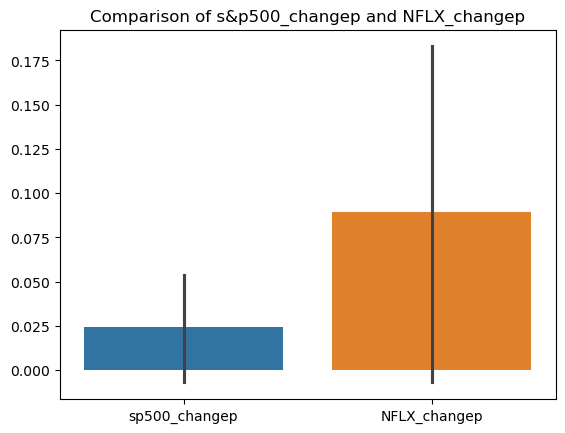

In [157]:
sns.barplot(df2)
plt.title("Comparison of s&p500_changep and NFLX_changep")
plt.show()

## TSLA: Tesla, Inc. Common Stock

In [159]:
df["TSLA_increase"].value_counts()

TSLA_increase
 0    1064
 1    1062
-1       2
Name: count, dtype: int64

In [160]:
maxi = df.loc[df["TSLA_changep"].idxmax(),["TSLA_changep","Date","Year","Month","Day"]]

In [161]:
maxi

TSLA_changep              15.780256
Date            2020-02-03 00:00:00
Year                           2020
Month                             2
Day                          Monday
Name: 285, dtype: object

In [162]:
mini = df.loc[df["TSLA_changep"].idxmin(),["TSLA_changep","Date","Year","Month","Day"]]

In [163]:
mini

TSLA_changep             -13.644285
Date            2013-07-16 00:00:00
Year                           2013
Month                             7
Day                         Tuesday
Name: 1853, dtype: object

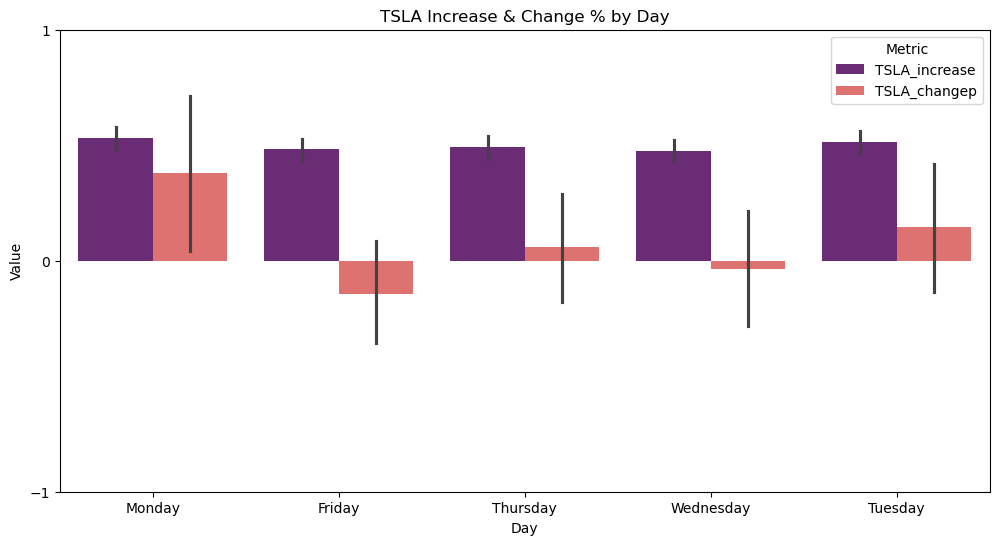

In [164]:
# Melt the DataFrame to reshape "NFLX_increase" and "NFLX_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["TSLA_increase", "TSLA_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("TSLA Increase & Change % by Day")

# Show the plot
plt.show()

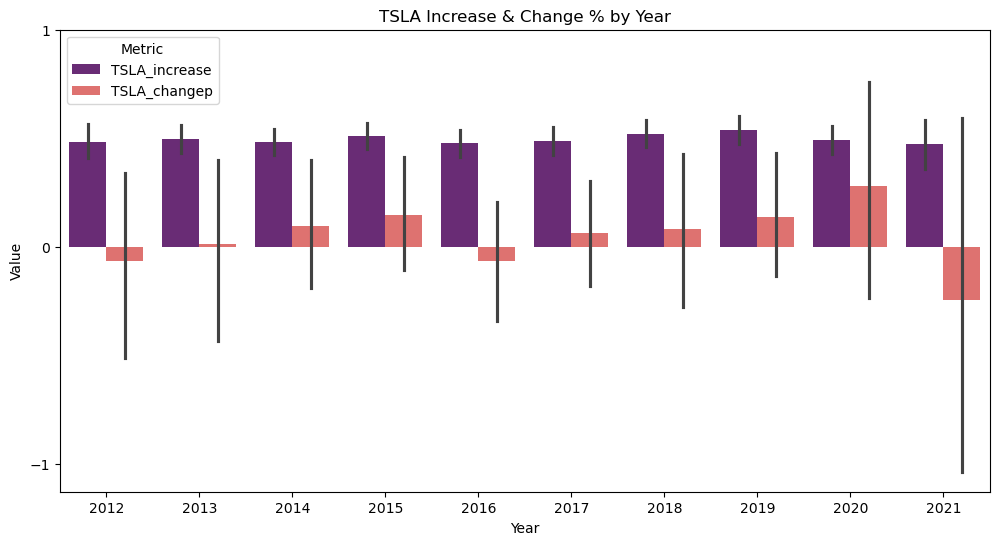

In [165]:
# Melt the DataFrame to reshape "TSLA_increase" and "TSLA_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["TSLA_increase", "TSLA_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("TSLA Increase & Change % by Year")

# Show the plot
plt.show()

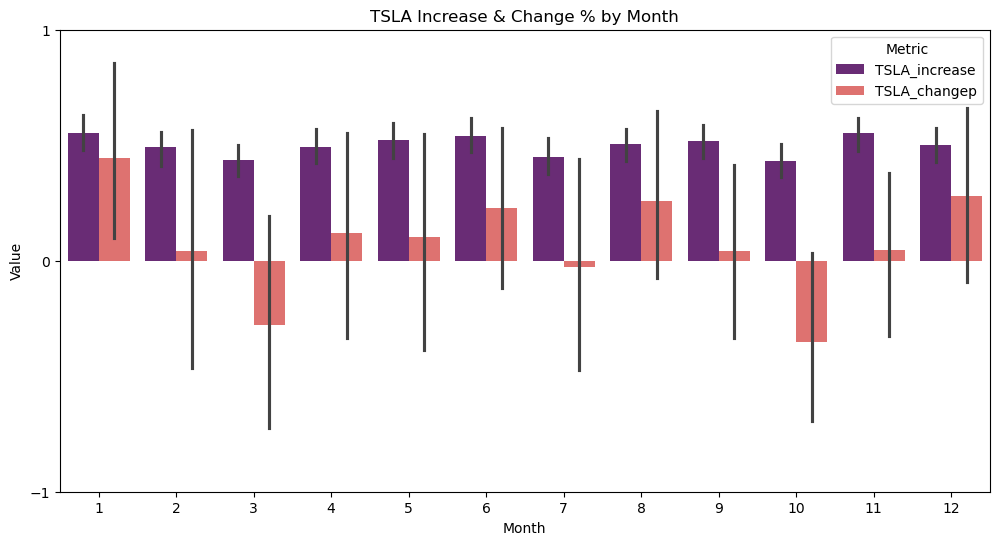

In [166]:
# Melt the DataFrame to reshape "NFLX_increase" and "NFLX_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["TSLA_increase", "TSLA_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("TSLA Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +15.78% in Tesla’s stock occurred on February 3, 2020. This surge in stock price likely reflects investor enthusiasm following Tesla’s strong performance and positive outlook for its electric vehicles (EV) and energy storage solutions.** 

### **The maximum negative change of -13.64% in Tesla’s stock occurred on July 16, 2013. This steep decline may have been driven by disappointing earnings results, concerns over production delays, or other negative news regarding Tesla's ability to scale its operations effectively.**

In [169]:
df1 = df[["sp500_increase","TSLA_increase"]].sort_values(by = "sp500_increase",ascending=False)

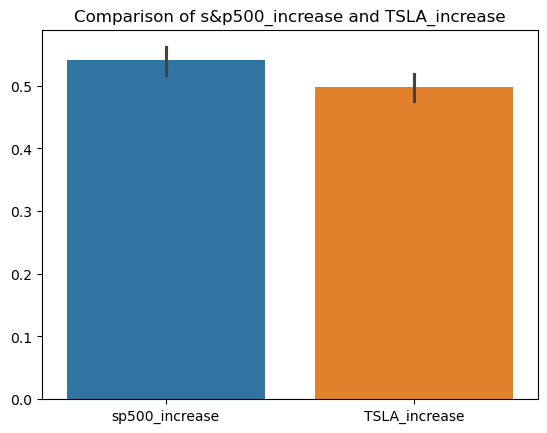

In [170]:
sns.barplot(df1)
plt.title("Comparison of s&p500_increase and TSLA_increase")
plt.show()

In [171]:
df2 = df[["sp500_changep","TSLA_changep"]].sort_values(by = "sp500_changep",ascending=False)

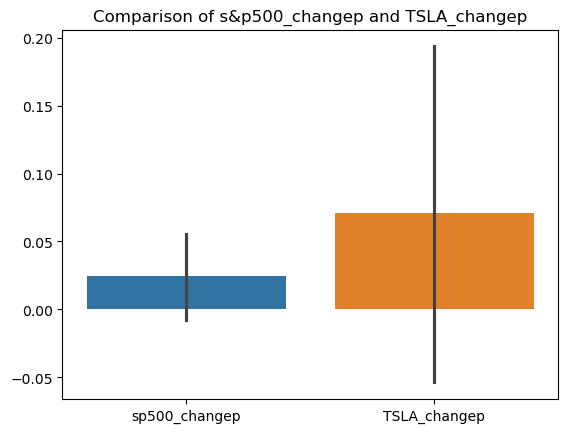

In [172]:
sns.barplot(df2)
plt.title("Comparison of s&p500_changep and TSLA_changep")
plt.show()

## META:Meta Platforms, Inc. Class A Common Stock

In [174]:
df["META_increase"].value_counts()

META_increase
 1    1086
 0    1037
-1       5
Name: count, dtype: int64

In [175]:
maxi = df.loc[df["META_changep"].idxmax(),["META_changep","Date","Year","Month","Day"]]

In [176]:
maxi

META_changep              11.243786
Date            2012-11-14 00:00:00
Year                           2012
Month                            11
Day                       Wednesday
Name: 2007, dtype: object

In [177]:
mini = df.loc[df["META_changep"].idxmin(),["META_changep","Date","Year","Month","Day"]]

In [178]:
mini

META_changep              -9.084421
Date            2012-05-18 00:00:00
Year                           2012
Month                             5
Day                          Friday
Name: 2127, dtype: object

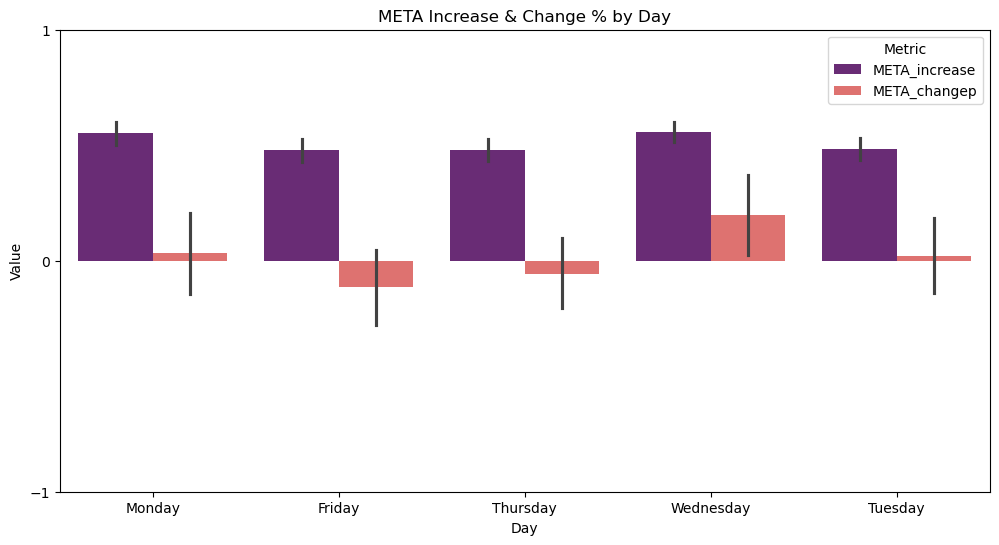

In [179]:
# Melt the DataFrame to reshape "META_increase" and "META_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["META_increase", "META_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("META Increase & Change % by Day")

# Show the plot
plt.show()

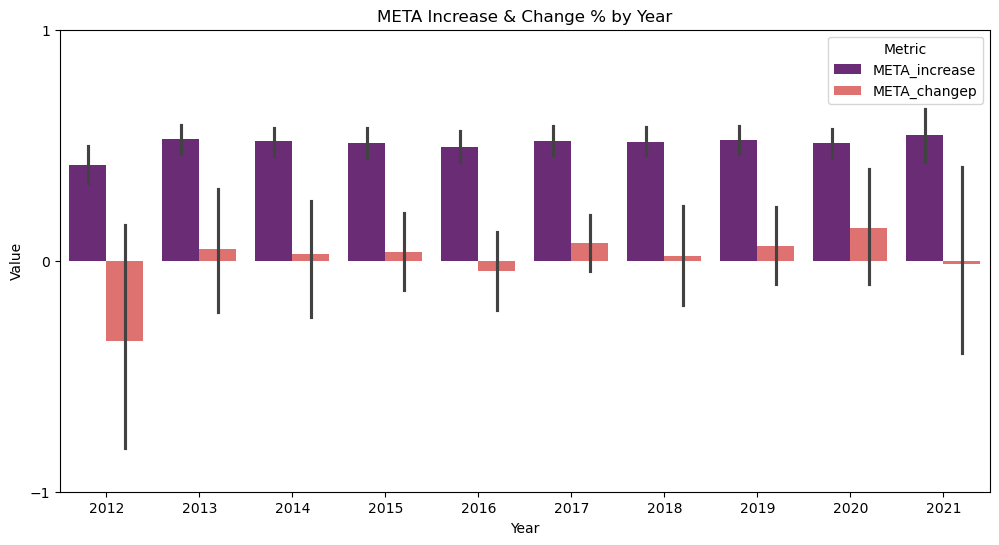

In [180]:
# Melt the DataFrame to reshape "META_increase" and "META_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["META_increase", "META_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("META Increase & Change % by Year")

# Show the plot
plt.show()

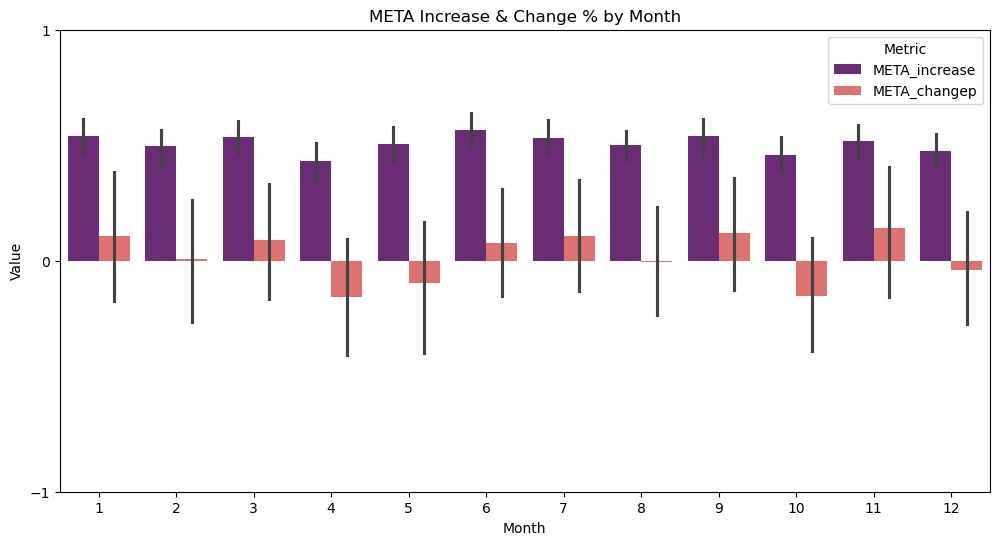

In [181]:
# Melt the DataFrame to reshape "META_increase" and "META_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["META_increase", "META_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("META Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +11.24% in Meta's stock occurred on November 14, 2012. This surge in stock price could have been driven by several positive factors, such as strong earnings, new product launches, or investor optimism following Facebook's IPO, which had occurred earlier in the year.**

### **The maximum negative change of -9.08% in Meta's stock occurred on May 18, 2012, just after Facebook’s IPO. The negative movement was likely caused by disappointing initial trading performance following the IPO, with investors expressing concerns about Facebook's valuation, advertising revenue, and its ability to generate sufficient growth, particularly on mobile platforms.** 

In [184]:
df1 = df[["sp500_increase","META_increase"]].sort_values(by = "sp500_increase",ascending=False)

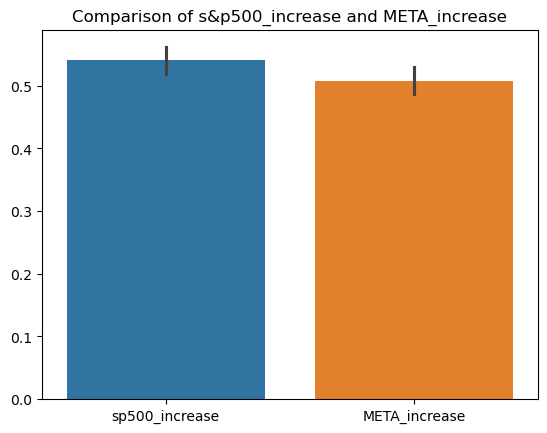

In [185]:
sns.barplot(df1)
plt.title("Comparison of s&p500_increase and META_increase")
plt.show()

In [186]:
df2 = df[["sp500_changep","META_changep"]].sort_values(by = "sp500_changep",ascending = False)

Text(0.5, 1.0, 'Comparison of s&p500_changep and META_changep')

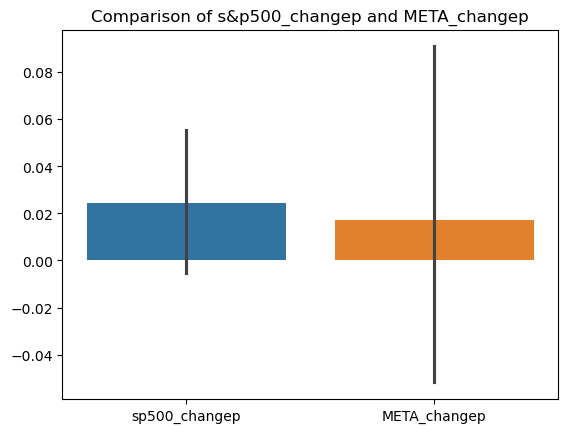

In [187]:
sns.barplot(df2)
plt.title("Comparison of s&p500_changep and META_changep")

## KFC

In [189]:
df["KFC_increase"].value_counts()

KFC_increase
 0    888
 1    733
-1    507
Name: count, dtype: int64

In [190]:
maxi = df.loc[df["KFC_changep"].idxmax(),["KFC_changep","Date","Year","Month","Day"]]

In [191]:
maxi

KFC_changep                   27.0
Date           2014-08-27 00:00:00
Year                          2014
Month                            8
Day                      Wednesday
Name: 1586, dtype: object

In [192]:
mini = df.loc[df["KFC_changep"].idxmin(),["KFC_changep","Date","Year","Month","Day"]]

In [193]:
mini

KFC_changep             -14.677641
Date           2014-09-05 00:00:00
Year                          2014
Month                            9
Day                         Friday
Name: 1580, dtype: object

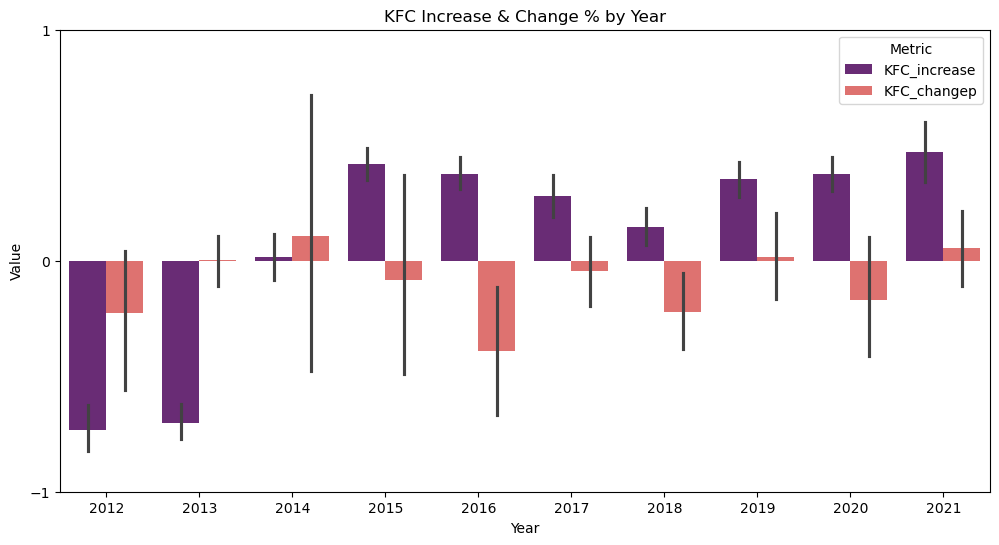

In [194]:
# Melt the DataFrame to reshape "KFC_increase" and "KFC_changep" into one column
df_melted = df.melt(id_vars =["Year"], value_vars =["KFC_increase", "KFC_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Year", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("KFC Increase & Change % by Year")

# Show the plot
plt.show()

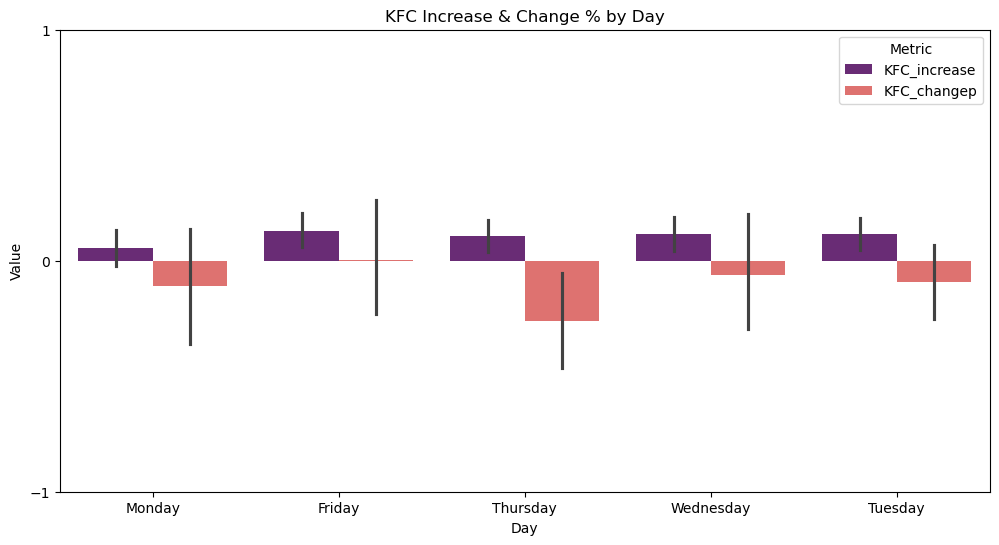

In [195]:
# Melt the DataFrame to reshape "KFC_increase" and "KFC_changep" into one column
df_melted = df.melt(id_vars =["Day"], value_vars =["KFC_increase", "KFC_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Day", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("KFC Increase & Change % by Day")

# Show the plot
plt.show()

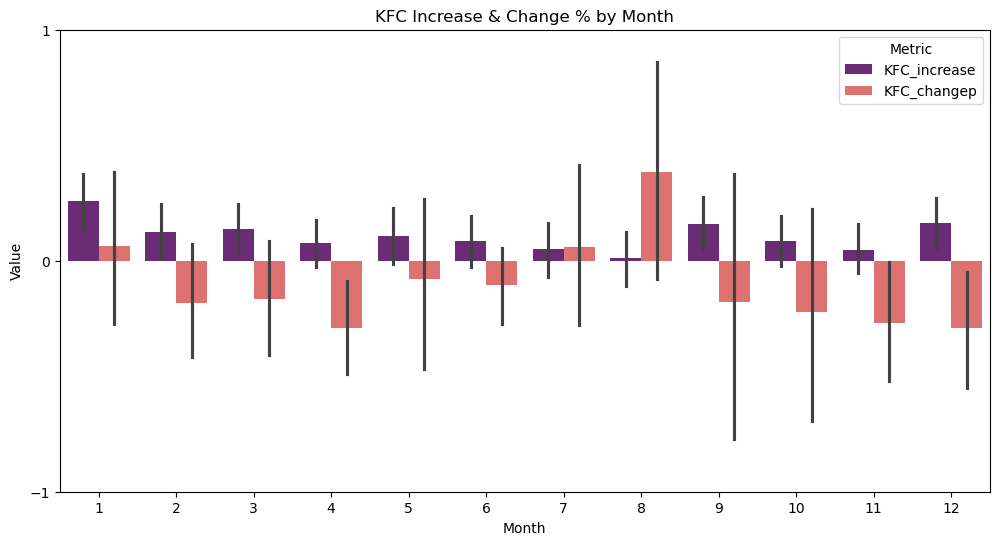

In [196]:
# Melt the DataFrame to reshape "KFC_increase" and "KFC_changep" into one column
df_melted = df.melt(id_vars =["Month"], value_vars =["KFC_increase", "KFC_changep"],
                    var_name="Metric", value_name="Value")

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.barplot(data=df_melted, x="Month", y="Value", hue="Metric", palette=("magma"))

# Set y-axis ticks
plt.yticks([-1, 0, 1])

# Set title
plt.title("KFC Increase & Change % by Month")

# Show the plot
plt.show()

### **The maximum positive change of +27.00% in KFC’s stock occurred on August 27, 2014. This sharp rise could have been driven by strong earnings reports, positive news about the company’s growth strategies, or new product offerings. KFC was likely benefiting from increased consumer demand, possibly due to new menu items or successful marketing campaigns.**

### **The maximum negative change of -14.68% in KFC’s stock occurred on September 5, 2014, which likely reflects negative market sentiment or poor financial performance related to KFC's operations during that period.**

In [199]:
df1 = df[["sp500_increase","KFC_increase"]].sort_values(by = "sp500_increase",ascending = False)

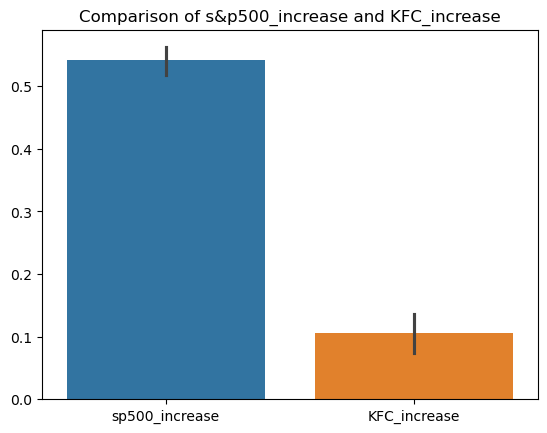

In [200]:
sns.barplot(df1)
plt.title("Comparison of s&p500_increase and KFC_increase")
plt.show()

In [201]:
df2 = df[["sp500_changep","KFC_changep"]].sort_values(by = "sp500_changep", ascending = False)

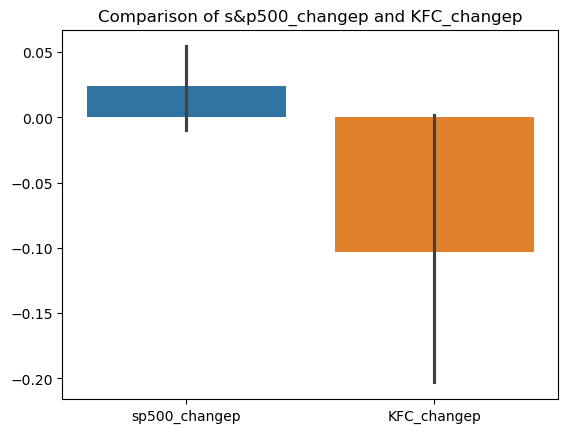

In [202]:
sns.barplot(df2)
plt.title("Comparison of s&p500_changep and KFC_changep")
plt.show()

<Axes: xlabel='Year'>

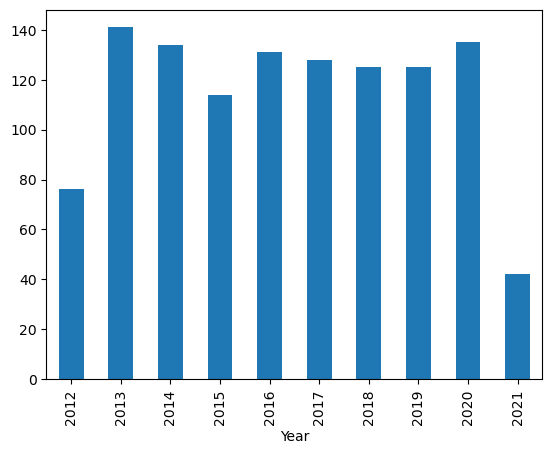

In [203]:
df.groupby("Year").sp500_increase.sum().plot(kind = "bar")

In [204]:
df.groupby("Year").sp500_increase.sum().sort_values()

Year
2021     42
2012     76
2015    114
2018    125
2019    125
2017    128
2016    131
2014    134
2020    135
2013    141
Name: sp500_increase, dtype: int64

In [205]:
df.groupby("Month").sp500_increase.sum().sort_values()

Month
12     80
9      84
5      85
4      95
6      96
10     96
1     100
2     101
3     102
11    102
8     103
7     107
Name: sp500_increase, dtype: int64

## sp500_increase by month (which month had the increase in sp index)

<Axes: xlabel='Month'>

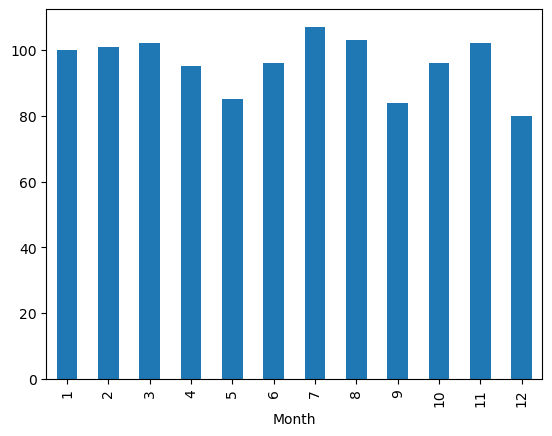

In [207]:
df.groupby("Month").sp500_increase.sum().plot(kind = "bar")

<Axes: xlabel='Year'>

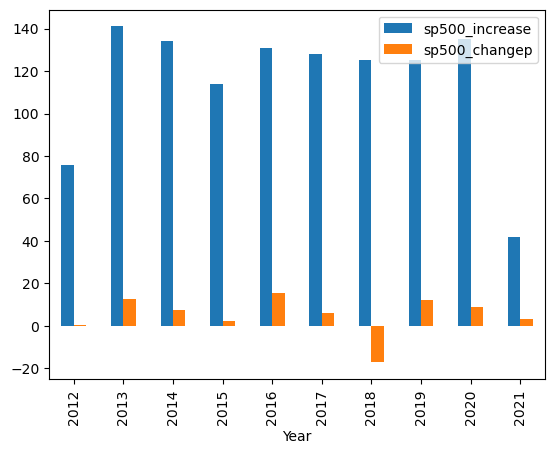

In [208]:
df.groupby("Year")[["sp500_increase","sp500_changep"]].sum().plot(kind = "bar")

In [209]:
df.groupby("Day")[["sp500_increase","sp500_changep"]].sum().sort_values(by = "sp500_increase")

,sp500_increase,sp500_changep
Day,,
Monday,206,8.891894
Tuesday,228,-1.597086
Wednesday,233,12.230805
Friday,240,11.385493
Thursday,244,20.579237


<Axes: xlabel='Day'>

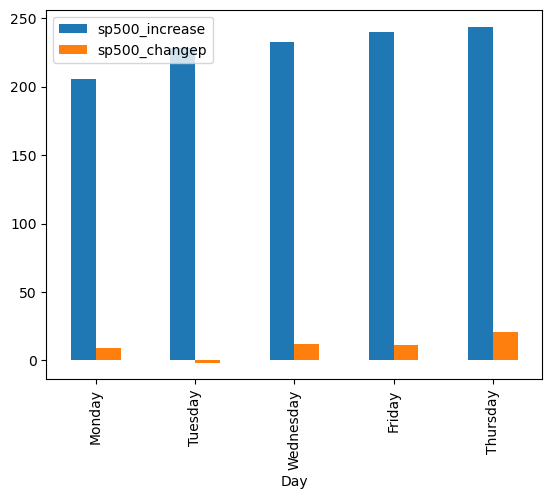

In [210]:
df.groupby("Day")[["sp500_increase","sp500_changep"]].sum().sort_values(by = "sp500_increase").plot(kind = "bar")

In [211]:
melted = df.melt(var_name="Metric", value_name="Value")
melted

,Metric,Value
0,Date,2021-04-19 00:00:00
1,Date,2021-04-16 00:00:00
2,Date,2021-04-15 00:00:00
3,Date,2021-04-14 00:00:00
4,Date,2021-04-13 00:00:00
...,...,...
55323,Day,Thursday
55324,Day,Wednesday
55325,Day,Tuesday
55326,Day,Monday
